In [4]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
demo_df = pd.read_csv('../Dataset/DEMO.csv')
pbcd_df = pd.read_csv('../Dataset/PBCD_I.csv')
rhq_df = pd.read_csv('../Dataset/RHQ_I.csv')
tst_df = pd.read_csv('../Dataset/TST_I.csv')

# Drop index columns if present
for df in [demo_df, pbcd_df, rhq_df, tst_df]:
    if 'Unnamed: 0' in df.columns:
        df.drop(columns=['Unnamed: 0'], inplace=True)


In [6]:
columns_names = {
    'SEQN': 'Respondent sequence number', # [cite: 498, 500]
    'WTSH2YR': 'Blood metal weights', # [cite: 506]
    'LBXBPB': 'Blood lead (ug/dL)', # [cite: 512]
    'LBDBPBSI': 'Blood lead (umol/L)', # [cite: 519, 521]
    'LBDBPBLC': 'Blood lead comment code', # [cite: 525]
    'LBXBCD': 'Blood cadmium (ug/L)', # [cite: 527]
    'LBDBCDSI': 'Blood cadmium (umol/L)', # [cite: 529]
    'LBDBCDLC': 'Blood cadmium comment code', # [cite: 531]
    'LBXTHG': 'Blood mercury, total (ug/L)', # [cite: 533]
    'LBDTHGSI': 'Blood mercury, total (nmol/L)', # [cite: 535]
    'LBDTHGLC': 'Blood mercury, total comment code', # [cite: 537]
    'LBXBSE': 'Blood selenium (ug/L)', # [cite: 539]
    'LBDBSESI': 'Blood selenium (umol/L)', # [cite: 541]
    'LBDBSELC': 'Blood selenium comment code', # [cite: 543]
    'LBXBMN': 'Blood manganese (ug/L)', # [cite: 545]
    'LBDBMNSI': 'Blood manganese (umol/L)', # [cite: 547]
    'LBDBMNLC': 'Blood manganese comment code', # [cite: 549]
    'LBXTST': 'Testosterone, total (ng/dL)', # [cite: 680, 681]
    'LBDTSTLC': 'Testosterone comment code', # [cite: 689]
    'LBXEST': 'Estradiol (pg/mL)', # [cite: 695, 697]
    'LBDESTLC': 'Estradiol Comment Code', # [cite: 701]
    'LBXSHBG': 'Sex Hormone Binding Globulin (SHBG, nmol/L)', # [cite: 703]
    'LBDSHGLC': 'SHBG Comment Code', # [cite: 705]
    'SDDSRVYR': 'Data release cycle',
    'RIDSTATR': 'Interview/Examination status',
    'RIAGENDR': 'Gender',
    'RIDAGEYR': 'Age in years at screening',
    'RIDAGEMN': 'Age in months at screening - 0 to 24 mos',
    'RIDRETH1': 'Race/Hispanic origin',
    'RIDRETH3': 'Race/Hispanic origin w/ NH Asian',
    'RIDEXMON': 'Six month time period',
    'RIDEXAGM': 'Age in months at exam - 0 to 19 years',
    'DMQMILIZ': 'Served active duty in US Armed Forces',
    'DMQADFC': 'Served in a foreign country',
    'DMDBORN4': 'Country of birth',
    'DMDCITZN': 'Citizenship status',
    'DMDYRSUS': 'Length of time in US',
    'DMDEDUC3': 'Education level - Children/Youth 6-19',
    'DMDEDUC2': 'Education level - Adults 20+',
    'DMDMARTL': 'Marital status',
    'RIDEXPRG': 'Pregnancy status at exam',
    'SIALANG': 'Language of SP Interview',
    'SIAPROXY': 'Proxy used in SP Interview?',
    'SIAINTRP': 'Interpreter used in SP Interview?',
    'FIALANG': 'Language of Family Interview',
    'FIAPROXY': 'Proxy used in Family Interview?',
    'FIAINTRP': 'Interpreter used in Family Interview?',
    'MIALANG': 'Language of MEC Interview',
    'MIAPROXY': 'Proxy used in MEC Interview?',
    'MIAINTRP': 'Interpreter used in MEC Interview?',
    'AIALANGA': 'Language of ACASI Interview',
    'DMDHHSIZ': 'Total number of people in the Household',
    'DMDFMSIZ': 'Total number of people in the Family',
    'DMDHHSZA': '# of children 5 years or younger in HH',
    'DMDHHSZB': '# of children 6-17 years old in HH',
    'DMDHHSZE': '# of adults 60 years or older in HH',
    'DMDHRGND': "HH ref person's gender",
    'DMDHRAGE': "HH ref person's age in years",
    'DMDHRBR4': "HH ref person's country of birth",
    'DMDHREDU': "HH ref person's education level",
    'DMDHRMAR': "HH ref person's marital status",
    'DMDHSEDU': "HH ref person's spouse's education level",
    'WTINT2YR': 'Full sample 2 year interview weight',
    'WTMEC2YR': 'Full sample 2 year MEC exam weight',
    'SDMVPSU': 'Masked variance pseudo-PSU',
    'SDMVSTRA': 'Masked variance pseudo-stratum',
    'INDHHIN2': 'Annual household income',
    'INDFMIN2': 'Annual family income',
    'INDFMPIR': 'Ratio of family income to poverty',
    'RHQ010': 'Age when first menstrual period occurred',
    'RHQ020': 'Age range at first menstrual period',
    'RHQ031': 'Had regular periods in past 12 months',
    'RHD043': 'Reason not having regular periods',
    'RHQ060': 'Age at last menstrual period',
    'RHQ070': 'Age range at last menstrual period',
    'RHQ074': 'Tried for a year to become pregnant?',
    'RHQ076': 'Seen a DR b/c unable to become pregnant?',
    'RHQ078': 'Ever treated for a pelvic infection/PID?',
    'RHQ131': 'Ever been pregnant?',
    'RHD143': 'Are you pregnant now?',
    'RHQ160': 'How many times have been pregnant?',
    'RHQ162': 'During pregnancy, told you have diabetes',
    'RHQ163': 'Age told you had diabetes while pregnant',
    'RHQ166': 'How many vaginal deliveries?',
    'RHQ169': 'How many cesarean deliveries?',
    'RHQ172': 'Any babies weigh 9 lbs or more?',
    'RHD173': 'Age when delivered baby 9 lbs or more?',
    'RHQ171': 'How many deliveries live birth result?',
    'RHD180': 'Age at first live birth',
    'RHD190': 'Age at last live birth',
    'RHQ197': 'How many months ago have baby?',
    'RHQ200': 'Now breastfeeding a child?',
    'RHD280': 'Had a hysterectomy?',
    'RHQ291': 'Age when had hysterectomy',
    'RHQ305': 'Had both ovaries removed?',
    'RHQ332': 'Age when both ovaries removed',
    'RHQ420': 'Ever taken birth control pills?',
    'RHQ540': 'Ever use female hormones?',
    'RHQ542A': 'Hormone pills used',
    'RHQ542B': 'Hormone patches used',
    'RHQ542C': 'Hormone cream/suppository/injection used',
    'RHQ542D': 'Other form of female hormone used',
    'RHQ554': 'Use hormone pills w/estrogen only',
    'RHQ560Q': 'How long taking estrogen-only pills?',
    'RHQ560U': 'Unit of measure: months, years',
    'RHQ570': 'Used estrogen/progestin combo pills',
    'RHQ576Q': 'How long taking estrogen/progestin?',
    'RHQ576U': 'Unit of measure: months, years',
    'RHQ580': 'Used estrogen-only patches?',
    'RHQ586Q': 'How long using estrogen only patches?',
    'RHQ586U': 'Unit of measure: months, years',
    'RHQ596': 'Used estrogen/progestin combo patches?',
    'RHQ602Q': 'How long use estrogen/progestin patch',
    'RHQ602U': 'Unit of measure: months, years'
}


In [7]:
# Configure pandas to display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

df_desc = {}

def print_desc():
    for key, value in df_desc.items():
        print(f"df_{key}: {value}")

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

sns.set(style="whitegrid", font_scale=1.1)

def plot_df(df, columns=None, plot_type='hist', target=None, hue=None, bins=30,
            clip_outliers=True, standardize=False, save_path=None,
            method='pearson', annot=True):
    """
    Enhanced plotting utility with heatmap support.

    Parameters:
    - df: pd.DataFrame
    - columns: list of str — column names to plot (1 or 2 depending on plot)
    - plot_type: str — 'hist', 'box', 'violin', 'scatter', 'pairplot', 'heatmap'
    - target: str — required for scatter plot
    - hue: str — optional group/categorical column
    - bins: int — histogram bin count
    - clip_outliers: bool — whether to remove outliers (1st–99th percentile)
    - standardize: bool — apply z-score normalization
    - save_path: str — if provided, saves plots to this directory
    - method: str — correlation method for heatmap ('pearson', 'spearman', 'kendall')
    - annot: bool — annotate heatmap cells with values
    """
    
    def _clip_series(series):
        if clip_outliers:
            lower, upper = series.quantile(0.01), series.quantile(0.99)
            return series.clip(lower, upper)
        return series

    def _standardize_series(series):
        return (series - series.mean()) / series.std() if standardize else series

    def _plot_and_save(fig, name):
        plt.tight_layout()
        if save_path:
            os.makedirs(save_path, exist_ok=True)
            fig_path = os.path.join(save_path, f"{name}_{plot_type}.png")
            plt.savefig(fig_path, dpi=300)
        plt.show()

    # HEATMAP
    if plot_type == 'heatmap':
        if columns is None:
            columns = df.select_dtypes(include=np.number).columns.tolist()

        corr_df = df[columns].copy()
        for col in columns:
            corr_df[col] = _clip_series(corr_df[col])
            corr_df[col] = _standardize_series(corr_df[col])

        corr = corr_df.corr(method=method)
        fig = plt.figure(figsize=(len(columns), len(columns)))
        sns.heatmap(corr, annot=annot, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={'label': f'{method.capitalize()} Correlation'})
        plt.title(f'{method.capitalize()} Correlation Heatmap')
        _plot_and_save(fig, "correlation")

        return  # early return

    # OTHER PLOTS
    if plot_type == 'hist':
        for col in columns:
            series = df[col].dropna()
            series = _clip_series(series)
            series = _standardize_series(series)

            fig = plt.figure(figsize=(8, 4))
            if hue is not None and hue in df.columns:
                # Align hue values with the filtered series index
                hue_series = df.loc[series.index, hue]
                sns.histplot(
                    x=series,
                    hue=hue_series,
                    bins=bins,
                    kde=True,
                    palette="Set2"
                )
            else:
                sns.histplot(series, bins=bins, kde=True)

            plt.title(f'Histogram of {col}')
            plt.xlabel(f'{col} {"(z-score)" if standardize else ""}')
            plt.ylabel('Count')
            _plot_and_save(fig, col)

    elif plot_type == 'box':
        for col in columns:
            fig = plt.figure(figsize=(8, 4))
            temp_df = df[[col] + ([hue] if hue else [])].dropna()
            temp_df[col] = _clip_series(temp_df[col])
            temp_df[col] = _standardize_series(temp_df[col])

            sns.boxplot(data=temp_df, x=hue, y=col) if hue else sns.boxplot(y=temp_df[col])
            plt.title(f'Box Plot of {col}')
            _plot_and_save(fig, col)

    elif plot_type == 'violin':
        for col in columns:
            fig = plt.figure(figsize=(8, 4))
            temp_df = df[[col] + ([hue] if hue else [])].dropna()
            temp_df[col] = _clip_series(temp_df[col])
            temp_df[col] = _standardize_series(temp_df[col])

            sns.violinplot(data=temp_df, x=hue, y=col) if hue else sns.violinplot(y=temp_df[col])
            plt.title(f'Violin Plot of {col}')
            _plot_and_save(fig, col)

    elif plot_type == 'scatter':
        if len(columns) != 1 or target is None:
            print("Error: For scatter, pass one feature column in `columns` and a target in `target`.")
            return
        x = df[columns[0]]
        y = df[target]
        temp_df = df[[columns[0], target] + ([hue] if hue else [])].dropna()
        temp_df[columns[0]] = _clip_series(temp_df[columns[0]])
        temp_df[target] = _clip_series(temp_df[target])

        fig = plt.figure(figsize=(8, 6))
        sns.scatterplot(data=temp_df, x=columns[0], y=target, hue=hue, alpha=0.7, edgecolor=None)
        plt.title(f'{columns[0]} vs {target}')
        _plot_and_save(fig, f"{columns[0]}_vs_{target}")

    elif plot_type == 'pairplot':
        if len(columns) < 2:
            print("Error: Pairplot needs at least 2 columns.")
            return
        cols = columns + ([hue] if hue else [])
        temp_df = df[cols].dropna()
        for col in columns:
            temp_df[col] = _clip_series(temp_df[col])
            temp_df[col] = _standardize_series(temp_df[col])
        sns.pairplot(temp_df, hue=hue)
        if save_path:
            plt.savefig(os.path.join(save_path, "pairplot.png"), dpi=300)
        plt.show()

    else:
        print(f"Unsupported plot_type: {plot_type}. Use 'hist', 'box', 'violin', 'scatter', 'pairplot', or 'heatmap'.")

def get_columns_with_missing_data(df, threshold=0.4):
    missing_ratio = df.isnull().mean()
    cols_above_threshold = missing_ratio[missing_ratio > threshold]
    return cols_above_threshold.sort_values(ascending=False)

def get_columns_with_missing_values(df, threshold=0.5):
    missing_ratio = df.isnull().mean()
    # Filter column names with missing ratio > threshold
    cols = missing_ratio[missing_ratio > threshold].index.tolist()
    return cols


import os

def save_df_to_csv(df, name, directory='csvs'):
    # Ensure the directory exists
    os.makedirs(directory, exist_ok=True)
    # Build full file path
    file_path = os.path.join(directory, f"{name}.csv")
    # Save to CSV
    df.to_csv(file_path, index=False)
    print(f"✅ DataFrame saved to: {file_path}")


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

def plot_feature_importance(
    df, 
    target_col, 
    drop_cols=None, 
    model_type='regression', 
    test_size=0.2, 
    random_state=42, 
    top_n=15
):
    """
    Train a Random Forest model and plot top N feature importances.

    Parameters:
    - df: pandas DataFrame
    - target_col: column name to predict
    - drop_cols: list of columns to exclude from features (e.g. ID or other targets)
    - model_type: 'regression' or 'classification'
    - test_size: fraction of data for test split
    - random_state: random seed for reproducibility
    - top_n: number of top features to plot
    """

    if drop_cols is None:
        drop_cols = []

    global top_features
    top_features = []

    # Prepare X and y
    features = df.drop([target_col] + drop_cols, axis=1)
    target = df[target_col]

    # Split
    X_train, X_test, y_train, y_test = train_test_split(
        features, target, test_size=test_size, random_state=random_state
    )

    # Choose model
    if model_type == 'regression':
        model = RandomForestRegressor(n_estimators=100, random_state=random_state)
    elif model_type == 'classification':
        from sklearn.ensemble import RandomForestClassifier
        model = RandomForestClassifier(n_estimators=100, random_state=random_state)
    else:
        raise ValueError("model_type must be 'regression' or 'classification'")

    # Fit model
    model.fit(X_train, y_train)

    # Feature importances
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    if top_n > len(indices):
        top_n = len(indices)
    
    # Limit to top_n features
    top_indices = indices[:top_n]
    top_features = [features.columns[i] for i in top_indices]
    top_importances = importances[top_indices]

    # Plot
    plt.figure(figsize=(10, 6))
    plt.title(f"Top {top_n} Feature Importances - Target: {target_col}")
    plt.bar(range(top_n), top_importances, align="center")
    plt.xticks(range(top_n), top_features, rotation=90)
    plt.tight_layout()
    plt.show()

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.linear_model import HuberRegressor

def preprocess_and_model(df, target_col, drop_cols=None, test_size=0.2, random_state=42, top_features=60):
    """
    df: input dataframe with target column included
    target_col: name of the target column as string
    drop_cols: list of column names to drop before modeling
    test_size: fraction for test split
    random_state: for reproducibility
    top_features: number of features to select with RandomForest

    Returns dictionary with performance metrics and best params of models
    """
    df = df.copy()

    # Drop ignored columns
    if drop_cols:
        drop_existing = [c for c in drop_cols if c in df.columns]
        df.drop(columns=drop_existing, inplace=True)

    # Separate features and target
    X = df.drop(columns=[target_col])
    y = df[target_col]

    # Identify columns by data type and unique values
    yes_no_cols = [col for col in X.columns if set(X[col].dropna().unique()).issubset({'yes', 'no', 'Yes', 'No', 'YES', 'NO'})]
    cat_cols_oh = [col for col in X.columns if X[col].nunique() < 5 and col not in yes_no_cols and X[col].dtype == 'object']
    numeric_cols = X.select_dtypes(include=np.number).columns.tolist()
    high_card_cols = [col for col in numeric_cols if X[col].nunique() > 30]
    low_card_num_cols = [col for col in numeric_cols if X[col].nunique() <= 30]

    # Imputers
    yes_no_imputer = SimpleImputer(strategy='most_frequent')
    cat_imputer = SimpleImputer(strategy='most_frequent')
    num_imputer = SimpleImputer(strategy='most_frequent')

    # Process Yes/No columns
    if yes_no_cols:
        X_yes_no_imp = yes_no_imputer.fit_transform(X[yes_no_cols])
        X_yes_no = pd.DataFrame(X_yes_no_imp, columns=yes_no_cols)
        for col in yes_no_cols:
            X_yes_no[col] = X_yes_no[col].str.lower().map({'yes': 1, 'no': 0})
    else:
        X_yes_no = pd.DataFrame()

    # Process categorical columns (<5 unique, excluding yes/no)
    if cat_cols_oh:
        X_cat_imp = cat_imputer.fit_transform(X[cat_cols_oh])
        X_cat = pd.DataFrame(X_cat_imp, columns=cat_cols_oh)
        ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
        X_cat_ohe = pd.DataFrame(ohe.fit_transform(X_cat), columns=ohe.get_feature_names_out(cat_cols_oh))
    else:
        X_cat_ohe = pd.DataFrame()

    # High-cardinality numeric (scale)
    if high_card_cols:
        X_high_card_imp = num_imputer.fit_transform(X[high_card_cols])
        scaler = MinMaxScaler()
        X_high_card = pd.DataFrame(scaler.fit_transform(X_high_card_imp), columns=high_card_cols)
    else:
        X_high_card = pd.DataFrame()

    # Low-cardinality numeric (no scale)
    if low_card_num_cols:
        X_low_card_imp = num_imputer.fit_transform(X[low_card_num_cols])
        X_low_card_num = pd.DataFrame(X_low_card_imp, columns=low_card_num_cols)
    else:
        X_low_card_num = pd.DataFrame()

    # Combine processed data
    X_processed = pd.concat([X_yes_no, X_cat_ohe, X_high_card, X_low_card_num], axis=1)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=test_size, random_state=random_state)

    # Feature selection using RandomForest
    rf = RandomForestRegressor(random_state=random_state)
    rf.fit(X_train, y_train)
    importances = pd.Series(rf.feature_importances_, index=X_train.columns)
    top_feats = importances.sort_values(ascending=False).head(top_features).index.tolist()

    X_train_sel = X_train[top_feats]
    X_test_sel = X_test[top_feats]

    # Models
    xgb = XGBRegressor(random_state=random_state, objective='reg:squarederror', eval_metric='mae')
    huber = HuberRegressor()

    xgb_param_grid = {'n_estimators': [50,100, 500, 1000], 'max_depth': [3, 5, 7, 12], 'learning_rate': [0.05, 0.1, 0.001, 0.01]}
    huber_param_grid = {'epsilon': [1.1, 1.35, 1.5], 'alpha': [0.0001, 0.001, 0.01]}

    xgb_gs = GridSearchCV(xgb, xgb_param_grid, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
    huber_gs = GridSearchCV(huber, huber_param_grid, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)

    xgb_gs.fit(X_train_sel, y_train)
    huber_gs.fit(X_train_sel, y_train)

    def evaluate_model(model, X_test, y_test):
        y_pred = model.predict(X_test)
        return {
            'MAE': mean_absolute_error(y_test, y_pred),
            'MSE': mean_squared_error(y_test, y_pred),
            'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
            'R2': r2_score(y_test, y_pred)
        }

    results = {
        'XGBoost Regressor': {'Best Params': xgb_gs.best_params_, 'Performance': evaluate_model(xgb_gs.best_estimator_, X_test_sel, y_test)},
        'Huber Regressor': {'Best Params': huber_gs.best_params_, 'Performance': evaluate_model(huber_gs.best_estimator_, X_test_sel, y_test)},
        'Selected Features': [f'{feature} : {columns_names[feature]}' for feature in top_feats],
        #'Selected Features': top_feats,
    }

    return results


# Global results tracker
global_results_df = pd.DataFrame(columns=["Model", "Best Params", "MAE", "MSE", "RMSE", "R2", "Selected Features"])

def preprocess_and_model(
    df,
    target_col,
    model,
    param_grid,
    drop_cols=None,
    test_size=0.2,
    random_state=42,
    top_features=60
):
    """
    df: DataFrame with target
    target_col: target column name
    model: scikit-learn compatible model (e.g. XGBRegressor())
    param_grid: dict for GridSearchCV
    drop_cols: list of columns to drop before processing
    """
    global global_results_df  # so we can append results

    df = df.copy()

    if drop_cols:
        drop_existing = [c for c in drop_cols if c in df.columns]
        df.drop(columns=drop_existing, inplace=True)

    X = df.drop(columns=[target_col])
    y = df[target_col]

    # Detect column types
    yes_no_cols = [col for col in X.columns if set(X[col].dropna().unique()).issubset({'yes','no','Yes','No','YES','NO'})]
    cat_cols_oh = [col for col in X.columns if X[col].nunique() < 5 and col not in yes_no_cols and X[col].dtype == 'object']
    numeric_cols = X.select_dtypes(include=np.number).columns.tolist()
    high_card_cols = [col for col in numeric_cols if X[col].nunique() > 30]
    low_card_num_cols = [col for col in numeric_cols if X[col].nunique() <= 30]

    yes_no_imputer = SimpleImputer(strategy='most_frequent')
    cat_imputer = SimpleImputer(strategy='most_frequent')
    num_imputer = SimpleImputer(strategy='most_frequent')

    # Process Yes/No
    if yes_no_cols:
        X_yes_no_imp = yes_no_imputer.fit_transform(X[yes_no_cols])
        X_yes_no = pd.DataFrame(X_yes_no_imp, columns=yes_no_cols)
        for col in yes_no_cols:
            X_yes_no[col] = X_yes_no[col].str.lower().map({'yes': 1, 'no': 0})
    else:
        X_yes_no = pd.DataFrame()

    # Process categorical
    if cat_cols_oh:
        X_cat_imp = cat_imputer.fit_transform(X[cat_cols_oh])
        X_cat = pd.DataFrame(X_cat_imp, columns=cat_cols_oh)
        ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
        X_cat_ohe = pd.DataFrame(ohe.fit_transform(X_cat), columns=ohe.get_feature_names_out(cat_cols_oh))
    else:
        X_cat_ohe = pd.DataFrame()

    # High-card numeric
    if high_card_cols:
        X_high_card_imp = num_imputer.fit_transform(X[high_card_cols])
        scaler = MinMaxScaler()
        X_high_card = pd.DataFrame(scaler.fit_transform(X_high_card_imp), columns=high_card_cols)
    else:
        X_high_card = pd.DataFrame()

    # Low-card numeric
    if low_card_num_cols:
        X_low_card_imp = num_imputer.fit_transform(X[low_card_num_cols])
        X_low_card_num = pd.DataFrame(X_low_card_imp, columns=low_card_num_cols)
    else:
        X_low_card_num = pd.DataFrame()

    # Merge all
    X_processed = pd.concat([X_yes_no, X_cat_ohe, X_high_card, X_low_card_num], axis=1)

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=test_size, random_state=random_state)

    # Feature selection
    rf = RandomForestRegressor(random_state=random_state)
    rf.fit(X_train, y_train)
    importances = pd.Series(rf.feature_importances_, index=X_train.columns)
    top_feats = importances.sort_values(ascending=False).head(top_features).index.tolist()

    X_train_sel = X_train[top_feats]
    X_test_sel = X_test[top_feats]

    # GridSearch on given model
    gs = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
    gs.fit(X_train_sel, y_train)

    def evaluate_model(model, X_test, y_test):
        y_pred = model.predict(X_test)
        return {
            'MAE': mean_absolute_error(y_test, y_pred),
            'MSE': mean_squared_error(y_test, y_pred),
            'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
            'R2': r2_score(y_test, y_pred)
        }

    eval_results = evaluate_model(gs.best_estimator_, X_test_sel, y_test)

    # Create current results row
    current_result = pd.DataFrame([{
        "Model": model.__class__.__name__,
        "Best Params": gs.best_params_,
        "MAE": eval_results["MAE"],
        "MSE": eval_results["MSE"],
        "RMSE": eval_results["RMSE"],
        "R2": eval_results["R2"],
        "Selected Features": top_feats
    }])

    # Append to global results
    global_results_df = pd.concat([global_results_df, current_result], ignore_index=True)

    return current_result

import shap
import matplotlib.pyplot as plt
import os

# Folder to save SHAP plots
shap_output_dir = "shap_outputs"
os.makedirs(shap_output_dir, exist_ok=True)

# def preprocess_and_model_shap(
#     df,
#     target_col,
#     model,
#     param_grid,
#     drop_cols=None,
#     test_size=0.2,
#     random_state=42,
#     top_features=60,
#     run_shap=True
# ):
#     global global_results_df

#     df = df.copy()

#     if drop_cols:
#         drop_existing = [c for c in drop_cols if c in df.columns]
#         df.drop(columns=drop_existing, inplace=True)

#     X = df.drop(columns=[target_col])
#     y = df[target_col]

#     yes_no_cols = [
#         col for col in X.columns
#         if set(X[col].dropna().unique()).issubset({'yes','no','Yes','No','YES','NO'})
#     ]
#     cat_cols_oh = [
#         col for col in X.columns
#         if X[col].nunique() < 5 and col not in yes_no_cols and X[col].dtype == 'object'
#     ]
#     numeric_cols = X.select_dtypes(include=np.number).columns.tolist()
#     high_card_cols = [col for col in numeric_cols if X[col].nunique() > 30]
#     low_card_num_cols = [col for col in numeric_cols if X[col].nunique() <= 30]

#     yes_no_imputer = SimpleImputer(strategy='most_frequent')
#     cat_imputer = SimpleImputer(strategy='most_frequent')
#     num_imputer = SimpleImputer(strategy='most_frequent')

#     if yes_no_cols:
#         X_yes_no_imp = yes_no_imputer.fit_transform(X[yes_no_cols])
#         X_yes_no = pd.DataFrame(X_yes_no_imp, columns=yes_no_cols)
#         for col in yes_no_cols:
#             X_yes_no[col] = X_yes_no[col].str.lower().map({'yes': 1, 'no': 0})
#     else:
#         X_yes_no = pd.DataFrame()

#     if cat_cols_oh:
#         X_cat_imp = cat_imputer.fit_transform(X[cat_cols_oh])
#         X_cat = pd.DataFrame(X_cat_imp, columns=cat_cols_oh)
#         ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
#         X_cat_ohe = pd.DataFrame(ohe.fit_transform(X_cat), columns=ohe.get_feature_names_out(cat_cols_oh))
#     else:
#         X_cat_ohe = pd.DataFrame()

#     if high_card_cols:
#         X_high_card_imp = num_imputer.fit_transform(X[high_card_cols])
#         scaler = MinMaxScaler()
#         X_high_card = pd.DataFrame(scaler.fit_transform(X_high_card_imp), columns=high_card_cols)
#     else:
#         X_high_card = pd.DataFrame()

#     if low_card_num_cols:
#         X_low_card_imp = num_imputer.fit_transform(X[low_card_num_cols])
#         X_low_card_num = pd.DataFrame(X_low_card_imp, columns=low_card_num_cols)
#     else:
#         X_low_card_num = pd.DataFrame()

#     X_processed = pd.concat([X_yes_no, X_cat_ohe, X_high_card, X_low_card_num], axis=1)

#     X_train, X_test, y_train, y_test = train_test_split(
#         X_processed, y, test_size=test_size, random_state=random_state
#     )

#     rf = RandomForestRegressor(random_state=random_state)
#     rf.fit(X_train, y_train)
#     importances = pd.Series(rf.feature_importances_, index=X_train.columns)
#     top_feats = importances.sort_values(ascending=False).head(top_features).index.tolist()

#     X_train_sel = X_train[top_feats]
#     X_test_sel = X_test[top_feats]

#     gs = GridSearchCV(model, param_grid, cv=3,
#                       scoring='neg_mean_absolute_error', n_jobs=-1)
#     gs.fit(X_train_sel, y_train)

#     def evaluate_model(model, X_test, y_test):
#         y_pred = model.predict(X_test)
#         return {
#             'MAE': mean_absolute_error(y_test, y_pred),
#             'MSE': mean_squared_error(y_test, y_pred),
#             'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
#             'R2': r2_score(y_test, y_pred)
#         }

#     eval_results = evaluate_model(gs.best_estimator_, X_test_sel, y_test)

#     current_result = pd.DataFrame([{
#         "Model": model.__class__.__name__,
#         "Best Params": gs.best_params_,
#         "MAE": eval_results["MAE"],
#         "MSE": eval_results["MSE"],
#         "RMSE": eval_results["RMSE"],
#         "R2": eval_results["R2"],
#         "Selected Features": top_feats
#     }])

#     global_results_df = pd.concat([global_results_df, current_result], ignore_index=True)

#     # ---------- SHAP Analysis ----------
#     if run_shap:
#         explainer = shap.Explainer(gs.best_estimator_, X_train_sel)
#         shap_values = explainer(X_test_sel)

#         # Summary plot (global feature importance)
#         plt.figure()
#         shap.summary_plot(shap_values, X_test_sel, show=False)
#         plt.tight_layout()
#         plt.savefig(os.path.join(shap_output_dir, f"{model.__class__.__name__}_summary.png"))
#         plt.close()

#         # Bar plot
#         plt.figure()
#         shap.summary_plot(shap_values, X_test_sel, plot_type="bar", show=False)
#         plt.tight_layout()
#         plt.savefig(os.path.join(shap_output_dir, f"{model.__class__.__name__}_bar.png"))
#         plt.close()

#         # Example individual prediction waterfall
#         shap.plots.waterfall(shap_values[0], show=False)
#         plt.tight_layout()
#         plt.savefig(os.path.join(shap_output_dir, f"{model.__class__.__name__}_waterfall.png"))
#         plt.close()

#     return current_result, gs.best_estimator_, X_test_sel, top_feats, shap_values

def preprocess_and_model_shap(
    df,
    target_col,
    model,
    param_grid,
    drop_cols=None,
    test_size=0.2,
    random_state=42,
    top_features=60,
    run_shap=True,
    external_results_path="all_results.csv"
):
    global global_results_df

    df = df.copy()

    # Drop unwanted columns if present
    if drop_cols:
        drop_existing = [c for c in drop_cols if c in df.columns]
        df.drop(columns=drop_existing, inplace=True)

    # Split features and target
    X = df.drop(columns=[target_col])
    y = df[target_col]

    # ---------------- Data preprocessing ----------------
    yes_no_cols = [
        col for col in X.columns
        if set(X[col].dropna().unique()).issubset({'yes','no','Yes','No','YES','NO'})
    ]
    cat_cols_oh = [
        col for col in X.columns
        if X[col].nunique() < 5 and col not in yes_no_cols and X[col].dtype == 'object'
    ]
    numeric_cols = X.select_dtypes(include=np.number).columns.tolist()
    high_card_cols = [col for col in numeric_cols if X[col].nunique() > 30]
    low_card_num_cols = [col for col in numeric_cols if X[col].nunique() <= 30]

    yes_no_imputer = SimpleImputer(strategy='most_frequent')
    cat_imputer = SimpleImputer(strategy='most_frequent')
    num_imputer = SimpleImputer(strategy='most_frequent')

    if yes_no_cols:
        X_yes_no_imp = yes_no_imputer.fit_transform(X[yes_no_cols])
        X_yes_no = pd.DataFrame(X_yes_no_imp, columns=yes_no_cols)
        for col in yes_no_cols:
            X_yes_no[col] = X_yes_no[col].str.lower().map({'yes': 1, 'no': 0})
    else:
        X_yes_no = pd.DataFrame()

    if cat_cols_oh:
        X_cat_imp = cat_imputer.fit_transform(X[cat_cols_oh])
        X_cat = pd.DataFrame(X_cat_imp, columns=cat_cols_oh)
        ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
        X_cat_ohe = pd.DataFrame(ohe.fit_transform(X_cat), columns=ohe.get_feature_names_out(cat_cols_oh))
    else:
        X_cat_ohe = pd.DataFrame()

    if high_card_cols:
        X_high_card_imp = num_imputer.fit_transform(X[high_card_cols])
        scaler = MinMaxScaler()
        X_high_card = pd.DataFrame(scaler.fit_transform(X_high_card_imp), columns=high_card_cols)
    else:
        X_high_card = pd.DataFrame()

    if low_card_num_cols:
        X_low_card_imp = num_imputer.fit_transform(X[low_card_num_cols])
        X_low_card_num = pd.DataFrame(X_low_card_imp, columns=low_card_num_cols)
    else:
        X_low_card_num = pd.DataFrame()

    X_processed = pd.concat([X_yes_no, X_cat_ohe, X_high_card, X_low_card_num], axis=1)

    # ---------------- Train-test split ----------------
    X_train, X_test, y_train, y_test = train_test_split(
        X_processed, y, test_size=test_size, random_state=random_state
    )

    # ---------------- Feature selection via RF ----------------
    rf = RandomForestRegressor(random_state=random_state)
    rf.fit(X_train, y_train)
    importances = pd.Series(rf.feature_importances_, index=X_train.columns)
    top_feats = importances.sort_values(ascending=False).head(top_features).index.tolist()

    X_train_sel = X_train[top_feats]
    X_test_sel = X_test[top_feats]

    # ---------------- Model training with GridSearch ----------------
    gs = GridSearchCV(model, param_grid, cv=3,
                      scoring='neg_mean_absolute_error', n_jobs=-1)
    gs.fit(X_train_sel, y_train)

    # ---------------- Evaluation ----------------
    def evaluate_model(model, X_test, y_test):
        y_pred = model.predict(X_test)
        return {
            'MAE': mean_absolute_error(y_test, y_pred),
            'MSE': mean_squared_error(y_test, y_pred),
            'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
            'R2': r2_score(y_test, y_pred)
        }

    eval_results = evaluate_model(gs.best_estimator_, X_test_sel, y_test)

    # Current result row
    current_result = pd.DataFrame([{
        "Model": model.__class__.__name__,
        "Best Params": gs.best_params_,
        "MAE": eval_results["MAE"],
        "MSE": eval_results["MSE"],
        "RMSE": eval_results["RMSE"],
        "R2": eval_results["R2"],
        "Selected Features": top_feats,
        "Target Variable": target_col
    }])

    # Add to global results
    global_results_df = pd.concat([global_results_df, current_result], ignore_index=True)

    # ---------------- External results persistence ----------------
    if os.path.exists(external_results_path):
        external_results = pd.read_csv(external_results_path)
        external_results = pd.concat([external_results, current_result], ignore_index=True)
    else:
        external_results = current_result

    external_results.to_csv(external_results_path, index=False)

    # ---------------- SHAP Analysis ----------------
    shap_values = None
    if run_shap:
        explainer = shap.Explainer(gs.best_estimator_, X_train_sel)
        shap_values = explainer(X_test_sel,check_additivity=False)

        # Summary plot
        plt.figure()
        shap.summary_plot(shap_values, X_test_sel, show=False)
        plt.tight_layout()
        plt.savefig(os.path.join(shap_output_dir, f"{model.__class__.__name__}_summary.png"))
        plt.close()

        # Bar plot
        plt.figure()
        shap.summary_plot(shap_values, X_test_sel, plot_type="bar", show=False)
        plt.tight_layout()
        plt.savefig(os.path.join(shap_output_dir, f"{model.__class__.__name__}_bar.png"))
        plt.close()

        # Example waterfall
        shap.plots.waterfall(shap_values[0], show=False)
        plt.tight_layout()
        plt.savefig(os.path.join(shap_output_dir, f"{model.__class__.__name__}_waterfall.png"))
        plt.close()

    # ---------------- Return structured outputs ----------------
    results_dict = {
        "best_model": gs.best_estimator_,
        "best_params": gs.best_params_,
        "eval_results": eval_results,
        "X_train": X_train_sel,
        "X_test": X_test_sel,
        "y_train": y_train,
        "y_test": y_test,
        "selected_features": top_feats,
        "shap_values": shap_values
    }

    return current_result, results_dict


import os
import joblib
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# global results dataframe
global_results_df = pd.DataFrame()

# ensure shap output directory exists
shap_output_dir = "shap_outputs"
os.makedirs(shap_output_dir, exist_ok=True)

def preprocess_and_model_shap_save(
    df,
    target_col,
    model,
    param_grid,
    drop_cols=None,
    test_size=0.2,
    random_state=42,
    top_features=60,
    run_shap=True,
    external_results_path="all_results.csv",
    save_model=False,                      
    model_path="best_model.joblib"
):
    global global_results_df

    df = df.copy()

    # ---------------- Drop unwanted columns ----------------
    if drop_cols:
        drop_existing = [c for c in drop_cols if c in df.columns]
        df.drop(columns=drop_existing, inplace=True)

    # ---------------- Split features and target ----------------
    X = df.drop(columns=[target_col])
    y = df[target_col]

    # ---------------- Data preprocessing ----------------
    yes_no_cols = [
        col for col in X.columns
        if set(X[col].dropna().unique()).issubset({'yes','no','Yes','No','YES','NO'})
    ]
    cat_cols_oh = [
        col for col in X.columns
        if X[col].nunique() < 5 and col not in yes_no_cols and X[col].dtype == 'object'
    ]
    numeric_cols = X.select_dtypes(include=np.number).columns.tolist()
    high_card_cols = [col for col in numeric_cols if X[col].nunique() > 30]
    low_card_num_cols = [col for col in numeric_cols if X[col].nunique() <= 30]

    yes_no_imputer = SimpleImputer(strategy='most_frequent')
    cat_imputer = SimpleImputer(strategy='most_frequent')
    num_imputer = SimpleImputer(strategy='most_frequent')

    if yes_no_cols:
        X_yes_no_imp = yes_no_imputer.fit_transform(X[yes_no_cols])
        X_yes_no = pd.DataFrame(X_yes_no_imp, columns=yes_no_cols)
        for col in yes_no_cols:
            X_yes_no[col] = X_yes_no[col].str.lower().map({'yes': 1, 'no': 0})
    else:
        X_yes_no = pd.DataFrame()

    if cat_cols_oh:
        X_cat_imp = cat_imputer.fit_transform(X[cat_cols_oh])
        X_cat = pd.DataFrame(X_cat_imp, columns=cat_cols_oh)
        ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
        X_cat_ohe = pd.DataFrame(ohe.fit_transform(X_cat), columns=ohe.get_feature_names_out(cat_cols_oh))
    else:
        X_cat_ohe = pd.DataFrame()

    if high_card_cols:
        X_high_card_imp = num_imputer.fit_transform(X[high_card_cols])
        scaler = MinMaxScaler()
        X_high_card = pd.DataFrame(scaler.fit_transform(X_high_card_imp), columns=high_card_cols)
    else:
        X_high_card = pd.DataFrame()

    if low_card_num_cols:
        X_low_card_imp = num_imputer.fit_transform(X[low_card_num_cols])
        X_low_card_num = pd.DataFrame(X_low_card_imp, columns=low_card_num_cols)
    else:
        X_low_card_num = pd.DataFrame()

    # combine all processed parts
    X_processed = pd.concat([X_yes_no, X_cat_ohe, X_high_card, X_low_card_num], axis=1)


    preprocessing_objects = {
    "yes_no_imputer": yes_no_imputer if yes_no_cols else None,
    "cat_imputer": cat_imputer if cat_cols_oh else None,
    "ohe": ohe if cat_cols_oh else None,
    "num_imputer": num_imputer,
    "scaler_high_card": scaler if high_card_cols else None
    }

    # ---------------- Train-test split ----------------
    X_train, X_test, y_train, y_test = train_test_split(
        X_processed, y, test_size=test_size, random_state=random_state
    )

    # ---------------- Feature selection via RandomForest ----------------
    rf = RandomForestRegressor(random_state=random_state)
    rf.fit(X_train, y_train)
    importances = pd.Series(rf.feature_importances_, index=X_train.columns)
    top_feats = importances.sort_values(ascending=False).head(top_features).index.tolist()

    X_train_sel = X_train[top_feats]
    X_test_sel = X_test[top_feats]

    # ---------------- Model training with GridSearch ----------------
    gs = GridSearchCV(model, param_grid, cv=3,
                      scoring='neg_mean_absolute_error', n_jobs=-1)
    gs.fit(X_train_sel, y_train)

    # ---------------- Evaluation ----------------
    def evaluate_model(model, X_test, y_test):
        y_pred = model.predict(X_test)
        return {
            'MAE': mean_absolute_error(y_test, y_pred),
            'MSE': mean_squared_error(y_test, y_pred),
            'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
            'R2': r2_score(y_test, y_pred)
        }

    eval_results = evaluate_model(gs.best_estimator_, X_test_sel, y_test)

    # ---------------- Save best model if requested ----------------
    if save_model:
        os.makedirs(os.path.dirname(model_path), exist_ok=True)  # 👈 create path if missing
        joblib.dump(gs.best_estimator_, model_path)
        print(f"✅ Best model saved to {model_path}")


    # ---------------- Current result row ----------------
    current_result = pd.DataFrame([{
        "Model": model.__class__.__name__,
        "Best Params": gs.best_params_,
        "MAE": eval_results["MAE"],
        "MSE": eval_results["MSE"],
        "RMSE": eval_results["RMSE"],
        "R2": eval_results["R2"],
        "Selected Features": top_feats,
        "Target Variable": target_col
    }])

    # Add to global results
    global_results_df = pd.concat([global_results_df, current_result], ignore_index=True)

    # ---------------- External results persistence ----------------
    if os.path.exists(external_results_path):
        external_results = pd.read_csv(external_results_path)
        external_results = pd.concat([external_results, current_result], ignore_index=True)
    else:
        external_results = current_result

    external_results.to_csv(external_results_path, index=False)

    # ---------------- SHAP Analysis ----------------
    shap_values = None
    if run_shap:
        explainer = shap.Explainer(gs.best_estimator_, X_train_sel)
        shap_values = explainer(X_test_sel)

        # Summary plot
        plt.figure()
        shap.summary_plot(shap_values, X_test_sel, show=False)
        plt.tight_layout()
        plt.savefig(os.path.join(shap_output_dir, f"{model.__class__.__name__}_summary.png"))
        plt.close()

        # Bar plot
        plt.figure()
        shap.summary_plot(shap_values, X_test_sel, plot_type="bar", show=False)
        plt.tight_layout()
        plt.savefig(os.path.join(shap_output_dir, f"{model.__class__.__name__}_bar.png"))
        plt.close()

        # Example waterfall
        shap.plots.waterfall(shap_values[0], show=False)
        plt.tight_layout()
        plt.savefig(os.path.join(shap_output_dir, f"{model.__class__.__name__}_waterfall.png"))
        plt.close()

    # ---------------- Return structured outputs ----------------
    results_dict = {
        "best_model": gs.best_estimator_,
        "best_params": gs.best_params_,
        "eval_results": eval_results,
        "X_train": X_train_sel,
        "X_test": X_test_sel,
        "y_train": y_train,
        "y_test": y_test,
        "selected_features": top_feats,
        "shap_values": shap_values,
        "preprocessing_objects": preprocessing_objects 
    }

    return current_result, results_dict


In [8]:
df_1 = demo_df.copy()
df_1 = df_1.merge(tst_df, on='SEQN', how='right')
df_desc[1] = "demo and tst merged"

df_2 = demo_df.copy()
df_2 = df_2.merge(pbcd_df, on='SEQN', how='right')
df_desc[2] = "demo and pbcd merged"

df_3 = demo_df.copy()
df_3 = df_3.merge(rhq_df, on='SEQN', how='right')
df_desc[3] = "demo and rhq merged"

df_4 = df_1.copy()
df_4 = df_4.merge(pbcd_df, on='SEQN', how='left')
df_desc[4] = "demo and rhq merged + pbcd left merged"

df_5 = df_4.copy()
df_5 = df_5.merge(rhq_df, on='SEQN', how='left')
df_desc[5] = "all mergerd for demo, tst, pbcd, rhq order"

### Cleaning

In [9]:
import re

def apply_skip_patterns(df, skip_rules):
    df = df.copy()
    
    # Identify RHQ/RHD columns in order
    rhq_cols = [col for col in df.columns if re.match(r'^RH[QD]\d{3}[A-Z]*$', col)]
    rhq_col_positions = {col: idx for idx, col in enumerate(rhq_cols)}
    
    pass_id = 1

    for trigger_col, skip_map in skip_rules.items():
        for trigger_val, skip_to in skip_map.items():
            if trigger_col not in rhq_col_positions:
                continue

            start_idx = rhq_col_positions[trigger_col]
            mask = df[trigger_col] == trigger_val

            # Determine skip range
            if skip_to == "END":
                skipped_cols = rhq_cols[start_idx + 1:]
            else:
                if skip_to not in rhq_col_positions:
                    continue
                end_idx = rhq_col_positions[skip_to]
                if end_idx <= start_idx:
                    continue
                skipped_cols = rhq_cols[start_idx + 1:end_idx]
            
            # Fill NaNs with pass_k in skipped columns
            for col in skipped_cols:
                df[col] = df[col].astype('object')  # Ensure column can hold strings
                df.loc[mask & df[col].isna(), col] = f"pass_{pass_id}"

            
            pass_id += 1
    
    return df


In [10]:
skip_rules = {
    "RHQ010": {
        0: "END"  
    },
    "RHQ031": {
        1: "RHQ060",  
        7: "RHQ060",  
        9: "RHQ060"   
    },
    "RHQ131": {
        2: "RHD280",  
        7: "RHD280",  
        9: "RHD280"   
    },
    
    "RHQ162": {
        2: "RHQ166",
        3: "RHQ166",
        7: "RHQ166",  
        9: "RHQ166"   
    },
    "RHQ172": {
        2: "RHQ171",  
        7: "RHQ171",  
        9: "RHQ171"
    },
    "RHD280": {
        2: "RHQ305",  
        7: "RHQ305",  
        9: "RHQ305"
    },
    "RHQ305": {
        2: "RHQ420",  
        7: "RHQ420",  
        9: "RHQ420"   
    },
    "RHQ540": {
        2: "END", 
        7: "END", 
        9: "END"  
    },
    "RHQ554": {
        2: "RHQ570", 
        7: "RHQ570", 
        9: "RHQ570"  
    },
    "RHQ570": {
        2: "RHQ580",  
        7: "RHQ580",  
        9: "RHQ580" 
    },
    "RHQ580": {
        2: "RHQ596",  
        7: "RHQ596",
        9: "RHQ596"   
    },
    "RHQ596": {
        2: "END",  
        7: "END",
        9: "END"   
    }
}

In [11]:
df_6 = rhq_df.copy()
df_6 = apply_skip_patterns(df_6, skip_rules)
df_desc[6] = "Applied skip patterns to RHQ/RHD columns"

In [12]:
import re

def apply_skip_patterns_numeric(df, skip_rules, pass_start=500):
    df = df.copy()
    
    # Identify RHQ/RHD columns in order
    rhq_cols = [col for col in df.columns if re.match(r'^RH[QD]\d{3}[A-Z]*$', col)]
    rhq_col_positions = {col: idx for idx, col in enumerate(rhq_cols)}
    
    pass_id = 1
    pass_map = {}  # Store pass_k -> numeric value mapping

    for trigger_col, skip_map in skip_rules.items():
        for trigger_val, skip_to in skip_map.items():
            if trigger_col not in rhq_col_positions:
                continue

            start_idx = rhq_col_positions[trigger_col]
            mask = df[trigger_col] == trigger_val

            # Determine skip range
            if skip_to == "END":
                skipped_cols = rhq_cols[start_idx + 1:]
            else:
                if skip_to not in rhq_col_positions:
                    continue
                end_idx = rhq_col_positions[skip_to]
                if end_idx <= start_idx:
                    continue
                skipped_cols = rhq_cols[start_idx + 1:end_idx]
            
            # Generate numeric pass value
            pass_label = f"pass_{pass_id}"
            pass_numeric = pass_start + pass_id - 1
            pass_map[pass_label] = pass_numeric

            # Apply to relevant columns
            for col in skipped_cols:
                df.loc[mask & df[col].isna(), col] = pass_label
            
            pass_id += 1

    # Final step: replace all pass_k with numeric codes
    df.replace(pass_map, inplace=True)
    df = df.infer_objects(copy=False)

    return df


In [13]:
df_7 = df_6.copy()
df_7 = apply_skip_patterns_numeric(df_7, skip_rules)
df_desc[7] = "Applied numeric skip patterns to RHQ/RHD columns"

C:\Users\USER\AppData\Local\Temp\ipykernel_22132\387585571.py:44: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(pass_map, inplace=True)


In [14]:
def mark_male_nans(df, rhq_prefixes=('RHQ', 'RHD'), male_code=300):
    df = df.copy()
    
    # Identify RHQ/RHD columns
    rhq_cols = [col for col in df.columns if any(col.startswith(prefix) for prefix in rhq_prefixes)]
    
    # Mask: rows where gender is male (RIAGENDR == 1)
    male_mask = df['RIAGENDR'] == 1
    
    # Replace NaNs in RHQ columns for male rows with the code
    for col in rhq_cols:
        df.loc[male_mask & df[col].isna(), col] = male_code

    return df


### CLEANING DEMO DATA

In [15]:
df_8 = demo_df.copy()
df_desc[8] = "demo_df copy for df_8"

In [16]:
def fix_demo_advanced(df):
    df = df.copy()

    # Precompute age and gender filters
    age = df['RIDAGEYR']
    is_male = df['RIAGENDR'] == 1
    is_female = df['RIAGENDR'] == 2

    # ----------------------------
    # RIDAGEMN: Only valid for age ≤ 2, others get age in months
    # ----------------------------
    df['RIDAGEMN'] = df.apply(
        lambda row: row['RIDAGEMN'] if row['RIDAGEYR'] <= 2 else row['RIDAGEYR'] * 12,
        axis=1
    )

    # ----------------------------
    # Combine DMDEDUC3 (6–19) and DMDEDUC2 (20+) into a unified education level column
    # ----------------------------
    df['COMBINED_EDUC'] = df['DMDEDUC3']
    # Fill missing values in DMDEDUC3 using 300+DMDEDUC2
    mask = df['COMBINED_EDUC'].isna() & df['DMDEDUC2'].notna()
    df.loc[mask, 'COMBINED_EDUC'] = df.loc[mask, 'DMDEDUC2'] + 300

    # ----------------------------
    # DMQMILIZ / DMQADFC: Military service — valid if age ≥ 17
    # ----------------------------
    df.loc[age < 17, ['DMQMILIZ', 'DMQADFC']] = 300

    # ----------------------------
    # DMDEDUC3: Children 6–19 only
    # ----------------------------
    df.loc[(age < 6) | (age > 19), 'DMDEDUC3'] = 300

    # ----------------------------
    # DMDEDUC2: Adults 20+ only
    # ----------------------------
    df.loc[age < 20, 'DMDEDUC2'] = 300

    # ----------------------------
    # DMDMARTL: Marital status — only for 16+ (modified)
    # ----------------------------
    df.loc[age < 16, 'DMDMARTL'] = 300

    # ----------------------------
    # RIDEXPRG: Pregnancy test – only for females age 20–44
    # ----------------------------
    df.loc[is_male, 'RIDEXPRG'] = 300
    df.loc[is_female & (age < 20), 'RIDEXPRG'] = 202
    df.loc[is_female & (age > 44), 'RIDEXPRG'] = 203

    # ----------------------------
    # MEC interview — age ≥ 8
    # ----------------------------
    df.loc[age < 8, ['MIALANG', 'MIAPROXY', 'MIAINTRP']] = 300

    # ----------------------------
    # ACASI Interview: age 8–69
    # ----------------------------
    df.loc[(age < 8) | (age > 69), 'AIALANGA'] = 300

    # ----------------------------
    # SP Interview Language and Proxy: skip if age < 1
    # ----------------------------
    df.loc[age < 1, ['SIALANG', 'SIAPROXY', 'SIAINTRP']] = 300
    df.loc[age < 1, ['FIALANG', 'FIAPROXY', 'FIAINTRP']] = 300

    # ----------------------------
    # DMDHSEDU (Spouse’s education): only if married (DMDMARTL == 1)
    # ----------------------------
    df.loc[df['DMDMARTL'] != 1, 'DMDHSEDU'] = 300

    # ----------------------------
    # Household reference fields: assign 300 if missing
    # ----------------------------
    hh_ref_cols = ['DMDHRGND', 'DMDHRAGE', 'DMDHRBR4', 'DMDHREDU', 'DMDHRMAR']
    for col in hh_ref_cols:
        df.loc[df[col].isna(), col] = 300

    # ----------------------------
    # Impute DMDYRSUS using DMDCITZN, DMDBORN4, and RIDAGEYR
    # ----------------------------
    def age_to_dmdyrsus(years):
        if pd.isna(years): return np.nan
        if years < 1: return 1
        elif years < 5: return 2
        elif years < 10: return 3
        elif years < 15: return 4
        elif years < 20: return 5
        elif years < 30: return 6
        elif years < 40: return 7
        elif years < 50: return 8
        else: return 9

    mask_na = df['DMDYRSUS'].isna()
    born_us = df['DMDBORN4'] == 1
    not_born_us = df['DMDBORN4'] == 2
    citizen = df['DMDCITZN'] == 1
    non_citizen = df['DMDCITZN'] == 2

    # Case 1: Born in US → years in US = age
    born_us_mask = mask_na & born_us
    df.loc[born_us_mask, 'DMDYRSUS'] = age[born_us_mask].apply(age_to_dmdyrsus)

    # Case 2: Not born in US but citizen → assume arrived at 5 y/o
    citizen_nonborn = mask_na & citizen & not_born_us
    df.loc[citizen_nonborn, 'DMDYRSUS'] = (age[citizen_nonborn] - 5).clip(lower=0).apply(age_to_dmdyrsus)

    # Case 3: Not a citizen → assume recent arrival
    noncitizen_mask = mask_na & non_citizen
    df.loc[noncitizen_mask, 'DMDYRSUS'] = (age[noncitizen_mask] - 5).clip(lower=0).apply(age_to_dmdyrsus)

    return df


In [17]:
df_8 = fix_demo_advanced(df_8)
df_desc[8] = "Fixed demo_df advanced issues"

In [18]:
import pandas as pd

def normalize_codes_by_lists(df, list_777_999=None, list_77_99=None, list_7_9=None):
    df = df.copy()
    
    list_777_999 = list_777_999 or []
    list_77_99 = list_77_99 or []
    list_7_9 = list_7_9 or []
    
    # Rule 1: Replace 999 with 777
    for col in list_777_999:
        if col in df.columns:
            df[col] = df[col].replace({999: 777})
    
    # Rule 2: Replace 99 with 77
    for col in list_77_99:
        if col in df.columns:
            df[col] = df[col].replace({99: 77})
    
    # Rule 3: Replace 9 with 7
    for col in list_7_9:
        if col in df.columns:
            df[col] = df[col].replace({9: 7})
    
    return df

In [19]:
a1 = []
a2 = ['DMDBORN4','DMDYRSUS','DMDEDUC3','DMDMARTL','DMDHRBR4','DMDHRMAR','INDHHIN2','INDFMIN2']
a3 = ['DMQMILIZ','DMQADFC','DMDCITZN','DMDEDUC2','DMDHREDU','DMDHSEDU']

b1 = ['RHQ010','RHQ060','RHQ163','RHD173','RHD180','RHD190','RHQ197','RHQ291','RHQ332']
b2 = ['RHD043','RHQ070','RHQ160','RHQ166','RHQ169','RHQ171','RHQ542A','RHQ560Q','RHQ576Q','RHQ586Q','RHQ602Q']
b3 = ['RHQ020','RHQ031','RHQ074','RHQ076','RHQ078','RHQ131','RHD143','RHQ162','RHQ172','RHQ200','RHD280','RHQ305','RHQ420','RHQ540','RHQ554','RHQ560U','RHQ570','RHQ576U','RHQ580','RHQ586U','RHQ596','RHQ602U']

In [20]:
df_9 = df_7.copy()
df_10 = df_8.copy()

df_9 = normalize_codes_by_lists(
    df_9,
    list_777_999=b1,
    list_77_99=b2,
    list_7_9=b3
)

df_10 = normalize_codes_by_lists(
    df_10,
    list_777_999=a1,
    list_77_99=a2,
    list_7_9=a3
)

df_desc[9] = "Normalized codes in rhq"
df_desc[10] = "Normalized codes in demo"

In [102]:
df_11 = df_10.copy()
df_11 = df_11.merge(pbcd_df, on='SEQN', how='right')
df_11 = df_11.merge(tst_df, on='SEQN', how='left')
df_11 = df_11.merge(df_9, on='SEQN', how='left')
df_11.shape

(5815, 115)

In [ ]:
df["AgeGroup_Years"] = pd.cut(
    df["RIDAGEYR"],
    bins=[-1, 19, 45, float("inf")],
    labels=["Under 20", "20-45", "Above 45"]
)

# Bucket by months (same cutoffs but in months)
df["AgeGroup_Months"] = pd.cut(
    df["RIDAGEMN"],
    bins=[-1, 239, 540, float("inf")],
    labels=["Under 20y", "20-45y", "Above 45y"]
)

In [103]:
df_11['LBXEST'].notnull().sum()

4059

In [104]:
df_11 = mark_male_nans(df_11,male_code=-1)

In [105]:
df_11[["LBXEST","LBXTST","LBXSHBG"]].describe()

,LBXEST,LBXTST,LBXSHBG
count,4059.000000,4090.000000,3937.000000
mean,50.030961,167.459956,67.537600
std,333.141278,225.190864,53.357843
min,2.114000,0.530000,4.810000
25%,4.175000,10.625000,34.510000
50%,18.800000,27.100000,52.700000
75%,33.200000,322.000000,86.130000
max,12300.000000,2000.000000,833.900000


In [106]:
thresholds = [500,600,700, 800, 1000, 2000, 3000, 4000, 6000, 7000, 8000, 9000, 11000, 12000, 13000, 14000, 15000]

# count how many values are above each threshold for each column
outlier_counts = {}
for col in ["LBXEST","LBXTST","LBXSHBG"]:
    outlier_counts[col] = {thr: (df_11[col] > thr).sum() for thr in thresholds}

outlier_counts_df = pd.DataFrame(outlier_counts)
print("Outlier counts above thresholds:")
print(outlier_counts_df)

Outlier counts above thresholds:
       LBXEST  LBXTST  LBXSHBG
500        20     420        8
600        15     218        3
700        15     106        2
800        14      53        1
1000       12      12        0
2000       10       0        0
3000        6       0        0
4000        5       0        0
6000        4       0        0
7000        4       0        0
8000        3       0        0
9000        3       0        0
11000       1       0        0
12000       1       0        0
13000       0       0        0
14000       0       0        0
15000       0       0        0


In [107]:
target_columns = [
    #'LBXTST',      
    'LBXEST',      # Estradiol (regression)
    #'LBXSHBG',     # SHBG (regression)
    #'LBDTSTLC',    # Testosterone Status (classifi cation)
    #'LBDESTLC',    # Estradiol Status (classification)
    #'LBDSHGLC',    # SHBG Status (classification)
]
# Drop rows that have missing values in ANY of the target columns
df_12 = df_11.dropna(subset=target_columns)

# Optional: Reset index after dropping
df_12 = df_12.reset_index(drop=True)
df_12.shape

(4059, 115)

In [108]:
df_13 = df_11.dropna(subset=["LBXEST"])
df_13 = df_13.reset_index(drop=True)
df_desc[13] = "target column - LBXEST not null"

df_14 = df_11.dropna(subset=["LBXTST"])
df_14 = df_14.reset_index(drop=True)
df_desc[14] = "target column - LBXTST not null"

df_15 = df_11.dropna(subset=["LBXSHBG"])
df_15 = df_15.reset_index(drop=True)
df_desc[15] = "target column - LBXSHBG not null"

In [109]:
df_16  = df_13[df_13["LBXEST"]  <= 600].copy()
df_desc[16] = "df_13 with LBXEST with <= 1000 outliers removed"

df_17  = df_14[df_14["LBXTST"]  <= 1200].copy()
df_desc[17] = "df_14 with LBXTST with <= 1000 outliers removed"

df_18  = df_15[df_15["LBXSHBG"]  <= 500].copy()
df_desc[18] = "df_15 with LBXSHBG with <= 1000 outliers removed"

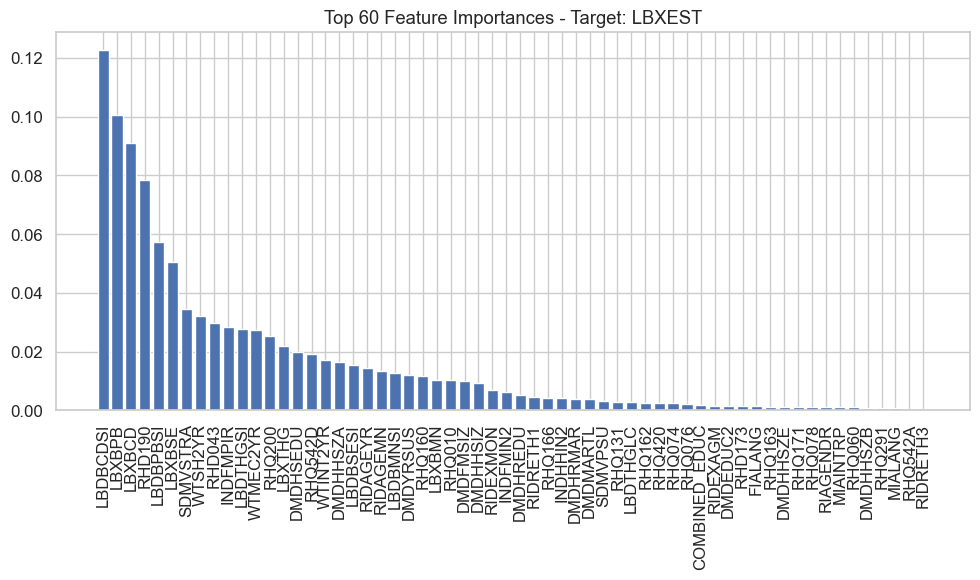

In [110]:
plot_feature_importance(
    df=df_12,
    target_col='LBXEST',
    drop_cols=['LBXTST', 'LBDTSTLC', 'LBDESTLC', 'LBXSHBG', 'LBDSHGLC', 'SEQN', 'LBXEST', 'RHD143', 'RIDEXPRG', 'RHD180', 'RHQ169','RHQ197','DMDHRAGE'],
    model_type='regression',
    top_n=60
)

In [111]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.linear_model import HuberRegressor

def preprocess_and_model(df, target_col, drop_cols=None, test_size=0.2, random_state=42, top_features=60):
    """
    df: input dataframe with target column included
    target_col: name of the target column as string
    drop_cols: list of column names to drop before modeling
    test_size: fraction for test split
    random_state: for reproducibility
    top_features: number of features to select with RandomForest

    Returns dictionary with performance metrics and best params of models
    """
    df = df.copy()

    # Drop ignored columns
    if drop_cols:
        drop_existing = [c for c in drop_cols if c in df.columns]
        df.drop(columns=drop_existing, inplace=True)

    # Separate features and target
    X = df.drop(columns=[target_col])
    y = df[target_col]

    # Identify columns by data type and unique values
    yes_no_cols = [col for col in X.columns if set(X[col].dropna().unique()).issubset({'yes', 'no', 'Yes', 'No', 'YES', 'NO'})]
    cat_cols_oh = [col for col in X.columns if X[col].nunique() < 5 and col not in yes_no_cols and X[col].dtype == 'object']
    numeric_cols = X.select_dtypes(include=np.number).columns.tolist()
    high_card_cols = [col for col in numeric_cols if X[col].nunique() > 30]
    low_card_num_cols = [col for col in numeric_cols if X[col].nunique() <= 30]

    # Imputers
    yes_no_imputer = SimpleImputer(strategy='most_frequent')
    cat_imputer = SimpleImputer(strategy='most_frequent')
    num_imputer = SimpleImputer(strategy='most_frequent')

    # Process Yes/No columns
    if yes_no_cols:
        X_yes_no_imp = yes_no_imputer.fit_transform(X[yes_no_cols])
        X_yes_no = pd.DataFrame(X_yes_no_imp, columns=yes_no_cols)
        for col in yes_no_cols:
            X_yes_no[col] = X_yes_no[col].str.lower().map({'yes': 1, 'no': 0})
    else:
        X_yes_no = pd.DataFrame()

    # Process categorical columns (<5 unique, excluding yes/no)
    if cat_cols_oh:
        X_cat_imp = cat_imputer.fit_transform(X[cat_cols_oh])
        X_cat = pd.DataFrame(X_cat_imp, columns=cat_cols_oh)
        ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
        X_cat_ohe = pd.DataFrame(ohe.fit_transform(X_cat), columns=ohe.get_feature_names_out(cat_cols_oh))
    else:
        X_cat_ohe = pd.DataFrame()

    # High-cardinality numeric (scale)
    if high_card_cols:
        X_high_card_imp = num_imputer.fit_transform(X[high_card_cols])
        scaler = MinMaxScaler()
        X_high_card = pd.DataFrame(scaler.fit_transform(X_high_card_imp), columns=high_card_cols)
    else:
        X_high_card = pd.DataFrame()

    # Low-cardinality numeric (no scale)
    if low_card_num_cols:
        X_low_card_imp = num_imputer.fit_transform(X[low_card_num_cols])
        X_low_card_num = pd.DataFrame(X_low_card_imp, columns=low_card_num_cols)
    else:
        X_low_card_num = pd.DataFrame()

    # Combine processed data
    X_processed = pd.concat([X_yes_no, X_cat_ohe, X_high_card, X_low_card_num], axis=1)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=test_size, random_state=random_state)

    # Feature selection using RandomForest
    rf = RandomForestRegressor(random_state=random_state)
    rf.fit(X_train, y_train)
    importances = pd.Series(rf.feature_importances_, index=X_train.columns)
    top_feats = importances.sort_values(ascending=False).head(top_features).index.tolist()

    X_train_sel = X_train[top_feats]
    X_test_sel = X_test[top_feats]

    # Models
    xgb = XGBRegressor(random_state=random_state, objective='reg:squarederror', eval_metric='mae')
    huber = HuberRegressor()

    xgb_param_grid = {'n_estimators': [50,100, 500, 1000], 'max_depth': [3, 5, 7, 12], 'learning_rate': [0.05, 0.1, 0.001, 0.01]}
    huber_param_grid = {'epsilon': [1.1, 1.35, 1.5], 'alpha': [0.0001, 0.001, 0.01]}

    xgb_gs = GridSearchCV(xgb, xgb_param_grid, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
    huber_gs = GridSearchCV(huber, huber_param_grid, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)

    xgb_gs.fit(X_train_sel, y_train)
    huber_gs.fit(X_train_sel, y_train)

    def evaluate_model(model, X_test, y_test):
        y_pred = model.predict(X_test)
        return {
            'MAE': mean_absolute_error(y_test, y_pred),
            'MSE': mean_squared_error(y_test, y_pred),
            'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
            'R2': r2_score(y_test, y_pred)
        }

    results = {
        'XGBoost Regressor': {'Best Params': xgb_gs.best_params_, 'Performance': evaluate_model(xgb_gs.best_estimator_, X_test_sel, y_test)},
        'Huber Regressor': {'Best Params': huber_gs.best_params_, 'Performance': evaluate_model(huber_gs.best_estimator_, X_test_sel, y_test)},
        'Selected Features': [f'{feature} : {columns_names[feature]}' for feature in top_feats],
        #'Selected Features': top_feats,
    }

    return results


In [112]:
columns_names['RHQ160']

'How many times have been pregnant?'

In [113]:
# List of columns you want to include (plus target)
cols_to_use = [
    #'LBXEST',
    #'LBXBSE',
    'LBXEST',
    #'LBXSHBG',
  'LBDBSESI',
  #'RHD180',
  #'RHQ169',
  'LBDTHGSI',
  #'LBXTHG',
  'LBDBCDSI',
  'LBDBPBSI',
  'RIDAGEMN',
  'RHQ160',
  'LBDBMNSI',
  #'RIDAGEYR',
  #'LBXBCD',
  #'INDFMPIR',
  #'RHQ542D',
  #'INDHHIN2',
  #'WTINT2YR',
  #'WTMEC2YR',
  #'WTSH2YR',
  #'RHD190',
  #'LBXBPB',
  #'LBXBPB',
  #'INDFMPIR',
  #'RHQ131',
  'RIAGENDR',
    'RIDEXPRG',
]

# Filter df to keep only these columns
df_filtered = df_12[cols_to_use]

from xgboost import XGBRegressor

results, results_dic = preprocess_and_model_shap_save(
    df_filtered,
    target_col="LBXEST",
    model=XGBRegressor(random_state=42, objective="reg:squarederror"),
    param_grid={
        "n_estimators": [20, 100, 500, 1000],
        "max_depth": [3, 5, 7, 12],
        "learning_rate": [0.05, 0.1, 0.001, 0.01]
    },
    drop_cols=["SEQN", "DMDHRAGE"],
    top_features=20,
    save_model=True,
    model_path="./models/LBXSHBG/xgboost_model_1.joblib"

)
results

✅ Best model saved to ./models/LBXSHBG/xgboost_model_1.joblib


,Model,Best Params,MAE,MSE,RMSE,R2,Selected Features,Target Variable
0,XGBRegressor,"{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 20}",41.248166,71197.962223,266.829463,0.342438,"[RIDEXPRG, LBDBSESI, RHQ160, LBDBCDSI, LBDTHGSI, LBDBPBSI, RIDAGEMN, LBDBMNSI, RIAGENDR]",LBXEST


In [114]:
# List of columns you want to include (plus target)
cols_to_use = [
    #'LBXEST',
    #'LBXBSE',
    'LBXEST',
    #'LBXSHBG',
  'LBDBSESI',
  #'RHD180',
  #'RHQ169',
  'LBDTHGSI',
  #'LBXTHG',
  'LBDBCDSI',
  'LBDBPBSI',
  'RIDAGEMN',
  'RHQ160',
  'LBDBMNSI',
  #'RIDAGEYR',
  #'LBXBCD',
  #'INDFMPIR',
  #'RHQ542D',
  #'INDHHIN2',
  #'WTINT2YR',
  #'WTMEC2YR',
  #'WTSH2YR',
  #'RHD190',
  #'LBXBPB',
  #'LBXBPB',
  #'INDFMPIR',
  #'RHQ131',
  'RIAGENDR',
    'RIDEXPRG',
    # 'RHQ291',
    # 'RHQ305',
    # 'RHQ540'
]

# Filter df to keep only these columns
df_filtered = df_12[cols_to_use]

from xgboost import XGBRegressor

results, results_dic = preprocess_and_model_shap_save(
    df_filtered,
    target_col="LBXEST",
    model=XGBRegressor(random_state=42, objective="reg:squarederror"),
    param_grid={
        "n_estimators": [20, 100, 500, 1000],
        "max_depth": [3, 5, 7, 12],
        "learning_rate": [0.05, 0.1, 0.001, 0.01]
    },
    drop_cols=["SEQN", "DMDHRAGE"],
    top_features=20,
    save_model=True,
    model_path="./models/LBXEST/xgboost_model_EST_1.joblib"

)
results

✅ Best model saved to ./models/LBXEST/xgboost_model_EST_1.joblib


,Model,Best Params,MAE,MSE,RMSE,R2,Selected Features,Target Variable
0,XGBRegressor,"{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 20}",41.248166,71197.962223,266.829463,0.342438,"[RIDEXPRG, LBDBSESI, RHQ160, LBDBCDSI, LBDTHGSI, LBDBPBSI, RIDAGEMN, LBDBMNSI, RIAGENDR]",LBXEST


In [119]:
# List of columns you want to include (plus target)
cols_to_use = [
    #'LBXEST',
    #'LBXBSE',
    'LBXEST',
    #'LBXSHBG',
  'LBDBSESI',
  #'RHD180',
  #'RHQ169',
  'LBDTHGSI',
  #'LBXTHG',
  'LBDBCDSI',
  'LBDBPBSI',
  'RIDAGEMN',
  'RHQ160',
  'LBDBMNSI',
  #'RIDAGEYR',
  #'LBXBCD',
  #'INDFMPIR',
  #'RHQ542D',
  #'INDHHIN2',
  #'WTINT2YR',
  #'WTMEC2YR',
  #'WTSH2YR',
  #'RHD190',
  #'LBXBPB',
  #'LBXBPB',
  #'INDFMPIR',
  #'RHQ131',
  'RIAGENDR',
    'RIDEXPRG',
    # 'RHQ291',
    # 'RHQ305',
    # 'RHQ540'
]

# Filter df to keep only these columns
df_filtered = df_16[cols_to_use]

from xgboost import XGBRegressor

results, results_dic = preprocess_and_model_shap_save(
    df_filtered,
    target_col="LBXEST",
    model=XGBRegressor(random_state=42, objective="reg:squarederror"),
    param_grid={
        "n_estimators": [20, 100, 500, 1000],
        "max_depth": [3, 5, 7, 12],
        "learning_rate": [0.05, 0.1, 0.001, 0.01]
    },
    drop_cols=["SEQN", "DMDHRAGE"],
    top_features=20,
    save_model=True,
    model_path="./models/LBXEST/xgboost_model_EST_2.joblib"

)
results

✅ Best model saved to ./models/LBXEST/xgboost_model_EST_2.joblib


,Model,Best Params,MAE,MSE,RMSE,R2,Selected Features,Target Variable
0,XGBRegressor,"{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}",22.3604,2655.385158,51.530429,0.292094,"[RIDEXPRG, LBDBMNSI, LBDBSESI, RIDAGEMN, LBDTHGSI, LBDBCDSI, LBDBPBSI, RHQ160, RIAGENDR]",LBXEST


In [ ]:
# List of columns you want to include (plus target)
cols_to_use = [
    'LBXTST',
    #'LBXBSE',
    #'LBXEST',
    #'LBXSHBG',
  'LBDBSESI',
  #'RHD180',
  #'RHQ169',
  'LBDTHGSI',
  #'LBXTHG',
  'LBDBCDSI',
  'LBDBPBSI',
  'RIDAGEMN',
  'RHQ160',
  'LBDBMNSI',
  #'RIDAGEYR',
  #'LBXBCD',
  #'INDFMPIR',
  #'RHQ542D',
  #'INDHHIN2',
  #'WTINT2YR',
  #'WTMEC2YR',
  #'WTSH2YR',
  #'RHD190',
  #'LBXBPB',
  #'LBXBPB',
  #'INDFMPIR',
  #'RHQ131',
  'RIAGENDR',
    'RIDEXPRG',
    # 'RHQ291',
    # 'RHQ305',
    # 'RHQ540'
]

# Filter df to keep only these columns
df_filtered = df_17[cols_to_use]

from xgboost import XGBRegressor

results, results_dic = preprocess_and_model_shap_save(
    df_filtered,
    target_col="LBXTST",
    model=XGBRegressor(random_state=42, objective="reg:squarederror"),
    param_grid={
        "n_estimators": [20, 100, 500, 1000],
        "max_depth": [3, 5, 7, 12],
        "learning_rate": [0.05, 0.1, 0.001, 0.01]
    },
    drop_cols=["SEQN", "DMDHRAGE"],
    top_features=20,
    save_model=True,
    model_path="./models/LBXTST/xgboost_model_TST_2.joblib"

)
results

✅ Best model saved to ./models/LBXTST/xgboost_model_TST_2.joblib


,Model,Best Params,MAE,MSE,RMSE,R2,Selected Features,Target Variable
0,XGBRegressor,"{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}",64.054893,14317.416344,119.655407,0.722726,"[RIDAGEMN, RIAGENDR, RIDEXPRG, LBDBMNSI, LBDBPBSI, LBDBSESI, LBDBCDSI, LBDTHGSI, RHQ160, RHQ542D]",LBXTST


In [121]:
# List of columns you want to include (plus target)
cols_to_use = [
    #'LBXEST',
    #'LBXBSE',
    #'LBXEST',
    'LBXSHBG',
  'LBDBSESI',
  #'RHD180',
  #'RHQ169',
  'LBDTHGSI',
  #'LBXTHG',
  'LBDBCDSI',
  'LBDBPBSI',
  'RIDAGEMN',
  'RHQ160',
  'LBDBMNSI',
  #'RIDAGEYR',
  #'LBXBCD',
  #'INDFMPIR',
  #'RHQ542D',
  #'INDHHIN2',
  #'WTINT2YR',
  #'WTMEC2YR',
  #'WTSH2YR',
  #'RHD190',
  #'LBXBPB',
  #'LBXBPB',
  #'INDFMPIR',
  #'RHQ131',
  'RIAGENDR',
    'RIDEXPRG',
    # 'RHQ291',
    # 'RHQ305',
    # 'RHQ540'
]

# Filter df to keep only these columns
df_filtered = df_18[cols_to_use]

from xgboost import XGBRegressor

results, results_dic = preprocess_and_model_shap_save(
    df_filtered,
    target_col="LBXSHBG",
    model=XGBRegressor(random_state=42, objective="reg:squarederror"),
    param_grid={
        "n_estimators": [20, 100, 500, 1000],
        "max_depth": [3, 5, 7, 12],
        "learning_rate": [0.05, 0.1, 0.001, 0.01]
    },
    drop_cols=["SEQN", "DMDHRAGE"],
    top_features=20,
    save_model=True,
    model_path="./models/LBXSHBG/xgboost_model_SHBG_2.joblib"

)
results

✅ Best model saved to ./models/LBXSHBG/xgboost_model_SHBG_2.joblib


,Model,Best Params,MAE,MSE,RMSE,R2,Selected Features,Target Variable
0,XGBRegressor,"{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}",27.356428,1514.282758,38.913786,0.255824,"[RIDAGEMN, LBDBMNSI, LBDBSESI, LBDBPBSI, RIDEXPRG, LBDTHGSI, LBDBCDSI, RHQ160, RIAGENDR]",LBXSHBG


In [146]:
df_17[(df_17["LBXEST"] >= 2) & (df_17["LBXEST"] <= 4)].shape[0]

991

In [130]:
df_17[(df_17["LBXEST"] >= 2) & (df_17["LBXEST"] <= 4) & (df_17["RIAGENDR"] == 1)].shape[0]


479

RIDAGEMN
72.0     146
84.0     161
96.0     163
108.0    145
120.0    117
        ... 
912.0      5
924.0     10
936.0      8
948.0      6
960.0     84
Name: count, Length: 69, dtype: int64


C:\Users\USER\AppData\Local\Temp\ipykernel_22132\1181283381.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette="viridis",)


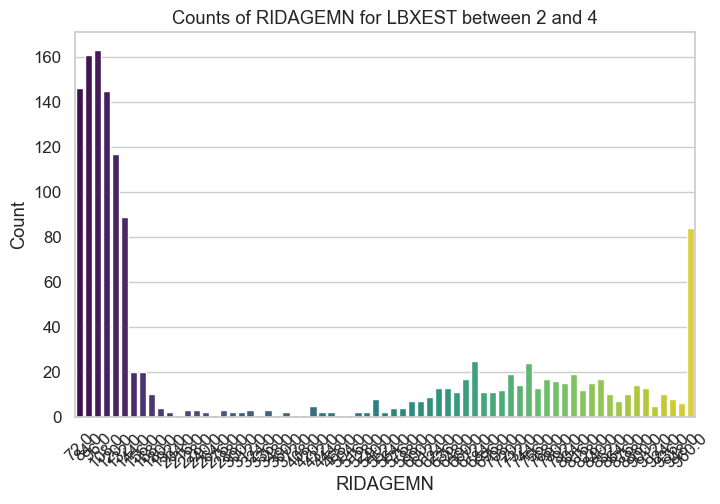

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data
filtered = df_17[(df_17["LBXEST"] >= 1) & (df_17["LBXEST"] <= 10)]

# Count values of RIDAGEMN
counts = filtered["RIDAGEMN"].value_counts().sort_index()
print(counts)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=counts.index, y=counts.values, palette="viridis",)
plt.xlabel("RIDAGEMN")
plt.ylabel("Count")
plt.title("Counts of RIDAGEMN for LBXEST between 2 and 4")
plt.xticks(rotation=45)
plt.show()


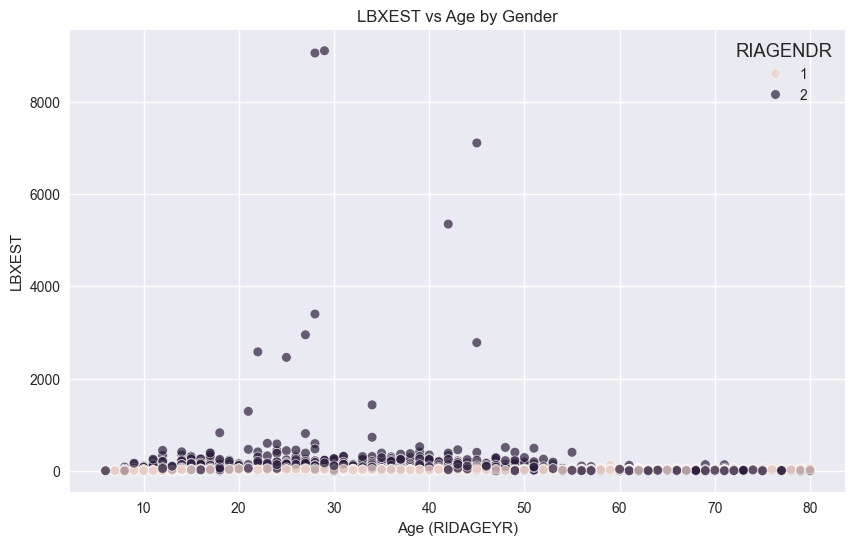

In [163]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=filtered,
    x="RIDAGEYR",
    y="LBXEST",
    hue="RIAGENDR",  # optional: color by gender
    alpha=0.7
)
plt.xlabel("Age (RIDAGEYR)")
plt.ylabel("LBXEST")
plt.title("LBXEST vs Age by Gender")
plt.show()


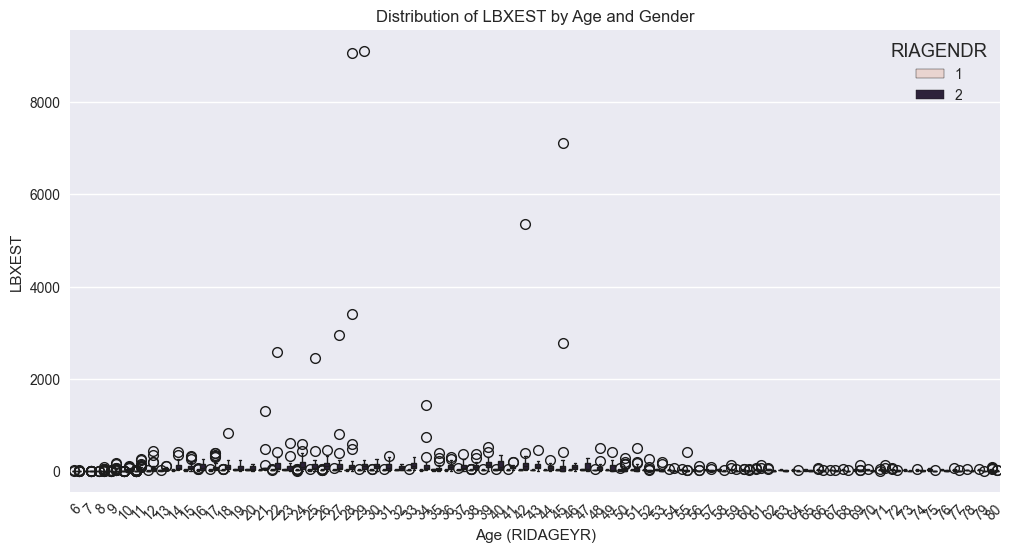

In [162]:
plt.figure(figsize=(12,6))
sns.boxplot(
    data=filtered,
    x="RIDAGEYR",
    y="LBXEST",
    hue="RIAGENDR"
)
plt.xlabel("Age (RIDAGEYR)")
plt.ylabel("LBXEST")
plt.title("Distribution of LBXEST by Age and Gender")
plt.xticks(rotation=45)
plt.show()


In [168]:
df_16["LBXEST"].describe()

count    4044.000000
mean       34.839928
std        58.436011
min         2.114000
25%         4.145000
50%        18.800000
75%        32.900000
max       597.000000
Name: LBXEST, dtype: float64

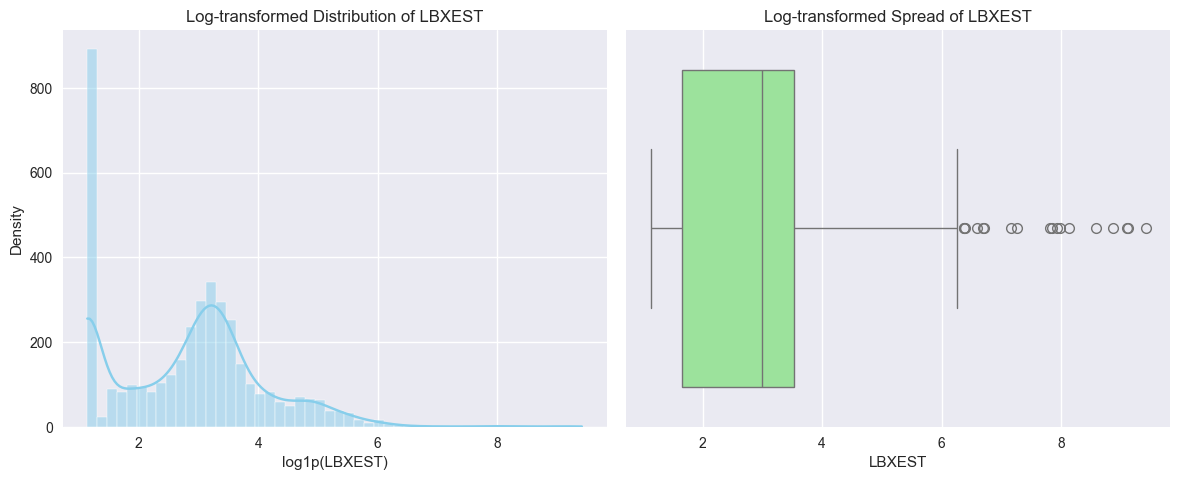

In [165]:
data_log = np.log1p(df_17["LBXEST"].dropna())  # log(1 + x) to handle zeros

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram in log scale
sns.histplot(data_log, bins=50, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title("Log-transformed Distribution of LBXEST")
axes[0].set_xlabel("log1p(LBXEST)")
axes[0].set_ylabel("Density")

# Boxplot with log scale
sns.boxplot(x=data_log, ax=axes[1], color='lightgreen')
axes[1].set_title("Log-transformed Spread of LBXEST")

plt.tight_layout()
plt.show()

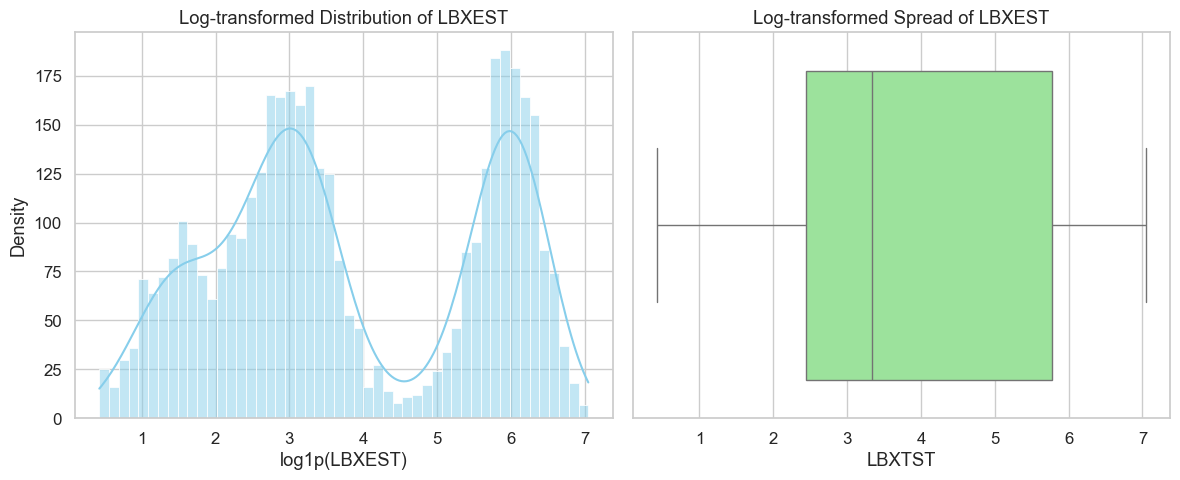

In [144]:
data_log = np.log1p(df_17["LBXTST"].dropna())  # log(1 + x) to handle zeros

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram in log scale
sns.histplot(data_log, bins=50, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title("Log-transformed Distribution of LBXEST")
axes[0].set_xlabel("log1p(LBXEST)")
axes[0].set_ylabel("Density")

# Boxplot with log scale
sns.boxplot(x=data_log, ax=axes[1], color='lightgreen')
axes[1].set_title("Log-transformed Spread of LBXEST")

plt.tight_layout()
plt.show()

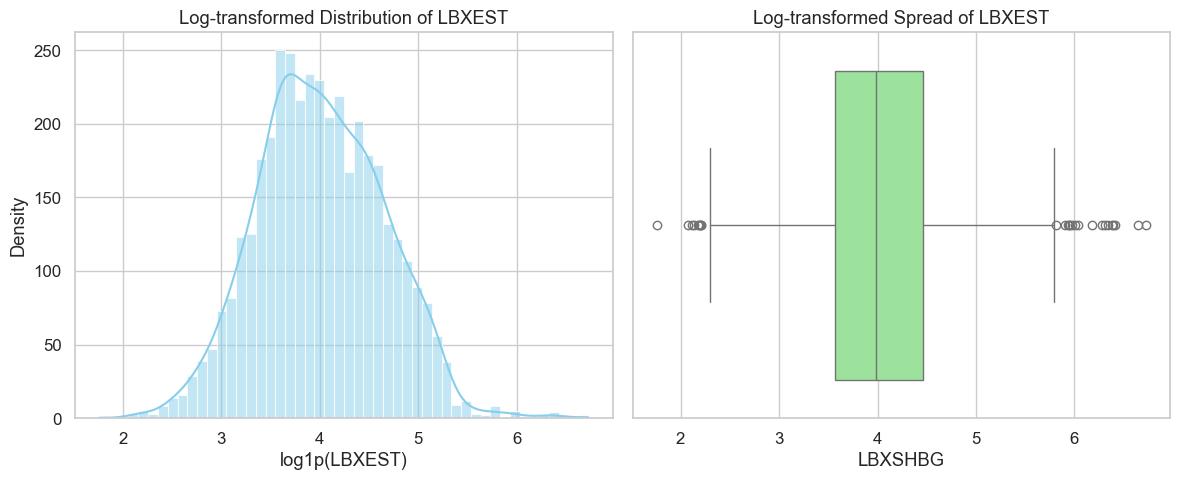

In [132]:
data_log = np.log1p(df_17["LBXSHBG"].dropna())  # log(1 + x) to handle zeros

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram in log scale
sns.histplot(data_log, bins=50, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title("Log-transformed Distribution of LBXEST")
axes[0].set_xlabel("log1p(LBXEST)")
axes[0].set_ylabel("Density")

# Boxplot with log scale
sns.boxplot(x=data_log, ax=axes[1], color='lightgreen')
axes[1].set_title("Log-transformed Spread of LBXEST")

plt.tight_layout()
plt.show()

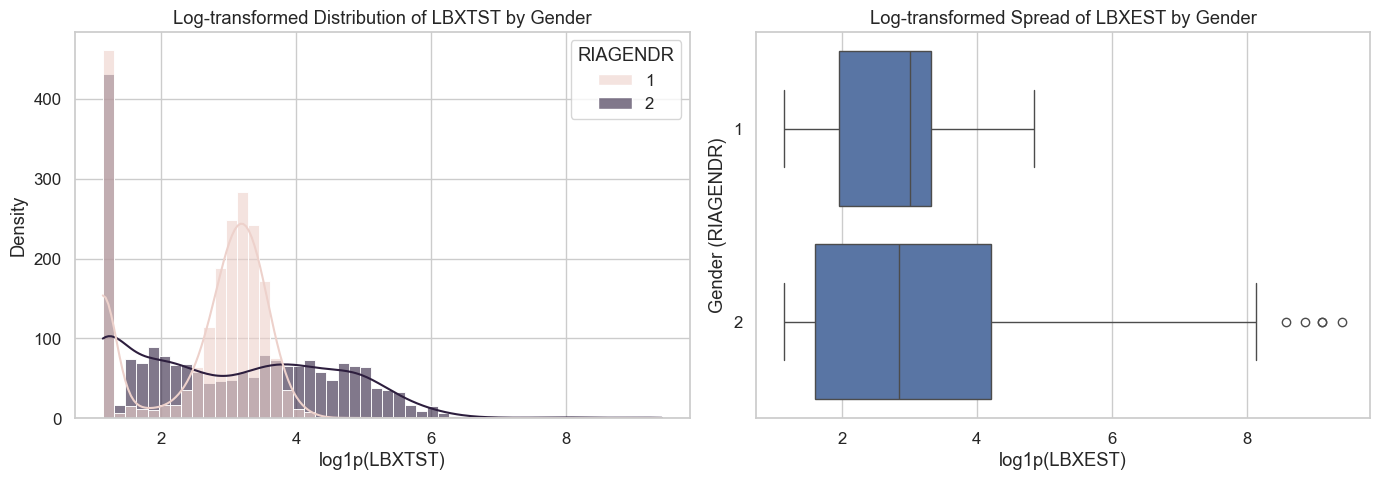

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Log-transform LBXEST
df_plot = df_17.dropna(subset=["LBXEST", "RIAGENDR"]).copy()
df_plot["LBXEST_log"] = np.log1p(df_plot["LBXEST"])

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram with hue (automatic colors)
sns.histplot(
    data=df_plot,
    x="LBXEST_log",
    hue="RIAGENDR",
    bins=50,
    kde=True,
    ax=axes[0],
    alpha=0.6
)
axes[0].set_title("Log-transformed Distribution of LBXTST by Gender")
axes[0].set_xlabel("log1p(LBXTST)")
axes[0].set_ylabel("Density")

# Boxplot with hue (automatic colors)
sns.boxplot(
    x="LBXEST_log",
    y="RIAGENDR",
    data=df_plot,
    orient="h"
)
axes[1].set_title("Log-transformed Spread of LBXEST by Gender")
axes[1].set_xlabel("log1p(LBXEST)")
axes[1].set_ylabel("Gender (RIAGENDR)")

plt.tight_layout()
plt.show()


In [100]:
import os
import joblib
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

# optional SMOGN (currently using SMOTE placeholder)
try:
    from imblearn.over_sampling import SMOTE
    smogn_available = True
except ImportError:
    smogn_available = False


# global results dataframe
global_results_df = pd.DataFrame()

def preprocess_and_model(
    df,
    target_col,
    model,
    param_grid,
    drop_cols=None,
    test_size=0.2,
    random_state=42,
    top_features=60,
    external_results_path="all_results.csv",
    use_smogn=False,
    standardize_target=False,
    log_transform_target=False
):
    """
    Preprocess data, train regression model with GridSearchCV,
    handle target imbalance/transformations if requested.
    """

    global global_results_df

    df = df.copy()

    # ---------------- Drop unwanted columns ----------------
    if drop_cols:
        drop_existing = [c for c in drop_cols if c in df.columns]
        df.drop(columns=drop_existing, inplace=True)

    # ---------------- Split features and target ----------------
    X = df.drop(columns=[target_col])
    y = df[target_col]

    # ---------------- Target transformations ----------------
    y_transformer = None
    if log_transform_target:
        y = np.log1p(y)
        y_transformer = "log"

    elif standardize_target:
        scaler_y = StandardScaler()
        y = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()
        y_transformer = scaler_y

    # ---------------- Data preprocessing ----------------
    yes_no_cols = [
        col for col in X.columns
        if set(X[col].dropna().unique()).issubset({'yes','no','Yes','No','YES','NO'})
    ]
    cat_cols_oh = [
        col for col in X.columns
        if X[col].nunique() < 5 and col not in yes_no_cols and X[col].dtype == 'object'
    ]
    numeric_cols = X.select_dtypes(include=np.number).columns.tolist()
    high_card_cols = [col for col in numeric_cols if X[col].nunique() > 30]
    low_card_num_cols = [col for col in numeric_cols if X[col].nunique() <= 30]

    yes_no_imputer = SimpleImputer(strategy='most_frequent')
    cat_imputer = SimpleImputer(strategy='most_frequent')
    num_imputer = SimpleImputer(strategy='most_frequent')

    if yes_no_cols:
        X_yes_no_imp = yes_no_imputer.fit_transform(X[yes_no_cols])
        X_yes_no = pd.DataFrame(X_yes_no_imp, columns=yes_no_cols)
        for col in yes_no_cols:
            X_yes_no[col] = X_yes_no[col].str.lower().map({'yes': 1, 'no': 0})
    else:
        X_yes_no = pd.DataFrame()

    if cat_cols_oh:
        X_cat_imp = cat_imputer.fit_transform(X[cat_cols_oh])
        X_cat = pd.DataFrame(X_cat_imp, columns=cat_cols_oh)
        ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
        X_cat_ohe = pd.DataFrame(ohe.fit_transform(X_cat), columns=ohe.get_feature_names_out(cat_cols_oh))
    else:
        X_cat_ohe = pd.DataFrame()

    if high_card_cols:
        X_high_card_imp = num_imputer.fit_transform(X[high_card_cols])
        scaler = MinMaxScaler()
        X_high_card = pd.DataFrame(scaler.fit_transform(X_high_card_imp), columns=high_card_cols)
    else:
        X_high_card = pd.DataFrame()

    if low_card_num_cols:
        X_low_card_imp = num_imputer.fit_transform(X[low_card_num_cols])
        X_low_card_num = pd.DataFrame(X_low_card_imp, columns=low_card_num_cols)
    else:
        X_low_card_num = pd.DataFrame()

    # combine all processed parts
    X_processed = pd.concat([X_yes_no, X_cat_ohe, X_high_card, X_low_card_num], axis=1)

    # ---------------- Train-test split ----------------
    X_train, X_test, y_train, y_test = train_test_split(
        X_processed, y, test_size=test_size, random_state=random_state
    )

    # ---------------- Handle imbalance ----------------
    if use_smogn and smogn_available:
        smote = SMOTE(random_state=random_state)
        X_train, y_train = smote.fit_resample(X_train, y_train)
    elif use_smogn:
        print("⚠️ SMOGN/SMOTE not available. Install imbalanced-learn.")

    # ---------------- Feature selection via RandomForest ----------------
    rf = RandomForestRegressor(random_state=random_state)
    rf.fit(X_train, y_train)
    importances = pd.Series(rf.feature_importances_, index=X_train.columns)
    top_feats = importances.sort_values(ascending=False).head(top_features).index.tolist()

    X_train_sel = X_train[top_feats]
    X_test_sel = X_test[top_feats]

    # ---------------- Model training with GridSearch ----------------
    gs = GridSearchCV(model, param_grid, cv=3,
                      scoring='neg_mean_absolute_error', n_jobs=-1)
    gs.fit(X_train_sel, y_train)

    # ---------------- Evaluation (with inverse transform) ----------------
    def inverse_transform(y_true, y_pred, transformer):
        if transformer == "log":
            return np.expm1(y_true), np.expm1(y_pred)
        elif isinstance(transformer, StandardScaler):
            y_true = transformer.inverse_transform(y_true.reshape(-1, 1)).ravel()
            y_pred = transformer.inverse_transform(y_pred.reshape(-1, 1)).ravel()
            return y_true, y_pred
        else:
            return y_true, y_pred

    # Get predictions
    y_pred = gs.best_estimator_.predict(X_test_sel)

    # Re-transform if needed
    y_test_inv, y_pred_inv = inverse_transform(y_test.values, y_pred, y_transformer)

    # Metrics in original scale
    eval_results = {
        'MAE': mean_absolute_error(y_test_inv, y_pred_inv),
        'MSE': mean_squared_error(y_test_inv, y_pred_inv),
        'RMSE': np.sqrt(mean_squared_error(y_test_inv, y_pred_inv)),
        'R2': r2_score(y_test_inv, y_pred_inv)
    }

    # ---------------- Current result row ----------------
    current_result = pd.DataFrame([{
        "Model": model.__class__.__name__,
        "Best Params": gs.best_params_,
        "MAE": eval_results["MAE"],
        "MSE": eval_results["MSE"],
        "RMSE": eval_results["RMSE"],
        "R2": eval_results["R2"],
        "Selected Features": top_feats,
        "Target Variable": target_col,
        "Target Transformation": str(y_transformer)
    }])

    # Add to global results
    global_results_df = pd.concat([global_results_df, current_result], ignore_index=True)

    # ---------------- External results persistence ----------------
    if os.path.exists(external_results_path):
        external_results = pd.read_csv(external_results_path)
        external_results = pd.concat([external_results, current_result], ignore_index=True)
    else:
        external_results = current_result

    external_results.to_csv(external_results_path, index=False)

    # ---------------- Return structured outputs ----------------
    results_dict = {
        "best_model": gs.best_estimator_,
        "best_params": gs.best_params_,
        "eval_results": eval_results,
        "y_test": y_test_inv,
        "y_pred": y_pred_inv,
        "X_train": X_train_sel,
        "X_test": X_test_sel,
        "y_train": y_train,
        "selected_features": top_feats,
        "target_transformer": y_transformer
    }

    return current_result, results_dict

In [87]:
columns_names['RHQ131']

'Ever been pregnant?'

In [37]:
df_filtered['RIDEXPRG'].value_counts()

RIDEXPRG
300.0    2024
202.0     749
203.0     729
2.0       526
1.0        17
3.0        14
Name: count, dtype: int64

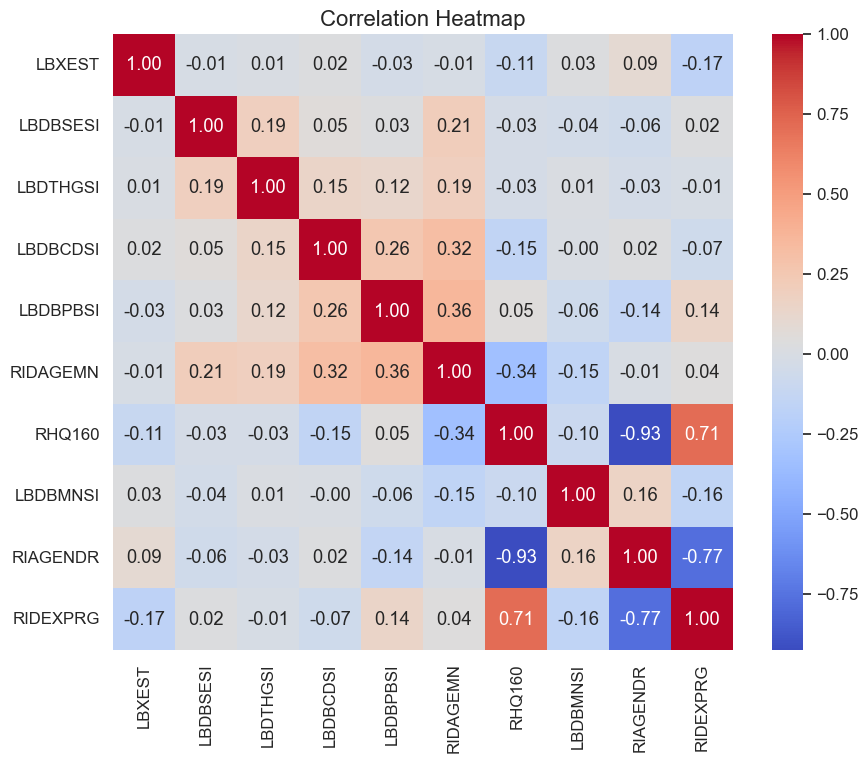

C:\Users\USER\AppData\Local\Temp\ipykernel_22132\3060922126.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette="viridis")


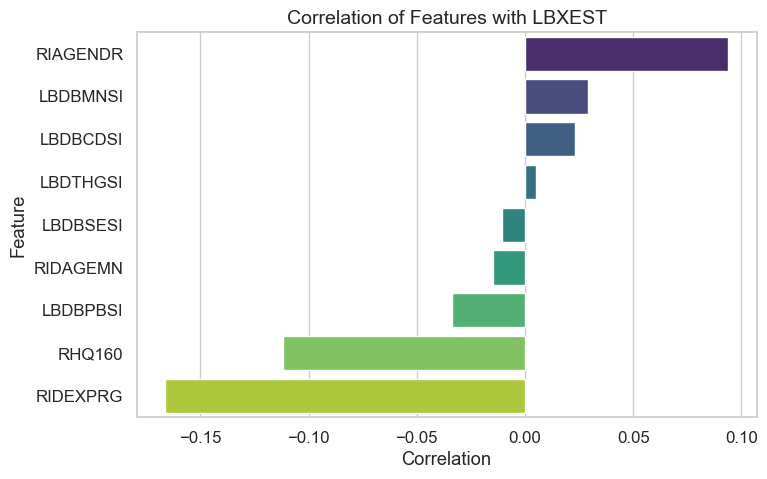

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is df and you already filtered cols_to_use
cols_to_use = [
    'LBXEST', 'LBDBSESI', 'LBDTHGSI', 'LBDBCDSI', 'LBDBPBSI',
    'RIDAGEMN', 'RHQ160', 'LBDBMNSI', 'RIAGENDR', 'RIDEXPRG'
]

df_corr = df_12[cols_to_use].corr()

# -----------------------------
# 1. Correlation Heatmap
# -----------------------------
plt.figure(figsize=(10,8))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

# -----------------------------
# 2. Correlation with Target
# -----------------------------
target = 'LBXEST'
corr_with_target = df_corr[target].drop(target).sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette="viridis")
plt.title(f"Correlation of Features with {target}", fontsize=14)
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.show()


In [32]:
save_df_to_csv(df_filtered, 'LBXSHBG_filtered')

✅ DataFrame saved to: csvs\LBXSHBG_filtered.csv


In [33]:
import pandas as pd

# Predictions
y_pred = results_dic['best_model'].predict(results_dic["X_test"])

# Create a comparison dataframe
comparison_df = pd.DataFrame({
    "Original_LBXTST": results_dic["y_test"].values,
    "Predicted_LBXTST": y_pred
})

# Optional: round for readability
comparison_df = comparison_df.round(2)

# Show side by side
print(comparison_df)


     Original_LBXTST  Predicted_LBXTST
0              64.40         80.300003
1              22.90         30.219999
2               2.11         10.830000
3              28.40         19.000000
4             104.00        143.940002
..               ...               ...
807             2.11          7.760000
808            66.30        109.699997
809           108.00         76.360001
810            45.90         29.320000
811            30.60         29.540001

[812 rows x 2 columns]


In [34]:
comparison_df.head(50)

,Original_LBXTST,Predicted_LBXTST
0,64.40,80.300003
1,22.90,30.219999
2,2.11,10.830000
3,28.40,19.000000
4,104.00,143.940002
5,31.30,23.870001
6,2.11,8.030000
7,2.11,8.230000
8,23.60,23.870001
9,2.11,7.740000


In [35]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# Define model registry: model class + parameter grid
regressor_configs = {
    "RandomForest": {
        "model": RandomForestRegressor(random_state=42),
        "param_grid": {
            "n_estimators": [100, 200,],
            "max_depth": [5, 10, None]
        }
    },
    "GradientBoosting": {
        "model": GradientBoostingRegressor(random_state=42),
        "param_grid": {
            "n_estimators": [100, 200, 500],
            "learning_rate": [0.05, 0.1],
            "max_depth": [3, 5, 7]
        }
    },
    "XGBoost": {
        "model": XGBRegressor(random_state=42, verbosity=0),
        "param_grid": {
            "n_estimators": [10, 50, 200, 500, 1000],
            "learning_rate": [0.05, 0.1, 0.001],
            "max_depth": [3, 5, 7]
        }
    },
    "LightGBM": {
        "model": LGBMRegressor(random_state=42),
        "param_grid": {
            "n_estimators": [200, 500],
            "learning_rate": [0.05, 0.1],
            "max_depth": [-1, 10, 3, 5]
        }
    },
    "CatBoost": {
        "model": CatBoostRegressor(random_state=42, silent=True),
        "param_grid": {
            "iterations": [200, 500,],
            "learning_rate": [0.05, 0.1],
            "depth": [7, 10, 3, 5]
        }
    }
}


all_model_results = []

for model_name, cfg in regressor_configs.items():
    print(f"\nRunning {model_name}...")
    current_result, results_dict = preprocess_and_model_shap(
        df=df_filtered,
        target_col="LBXEST",
        model=cfg["model"],
        param_grid=cfg["param_grid"],
        drop_cols=["SEQN", "DMDHRAGE"],
        run_shap=False,
        #external_results_path="all_results.csv",
    )
    
    all_model_results.append((model_name, current_result, results_dict))



Running RandomForest...

Running GradientBoosting...

Running XGBoost...

Running LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1066
[LightGBM] [Info] Number of data points in the train set: 3247, number of used features: 9
[LightGBM] [Info] Start training from score 49.035145
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

In [36]:
from sklearn.inspection import PartialDependenceDisplay

# Assume your model is sklearn-compatible (or wrapped)
features = ["LBDTHGSI"]
PartialDependenceDisplay.from_estimator(best_model, X_test_sel, features)
plt.show()


NameError: name 'best_model' is not defined

In [ ]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.1, random_state=42)
df["outlier"] = model.fit_predict(df[["value"]])

outliers = df[df["outlier"] == -1]
print("Outliers by Isolation Forest:\n", outliers)


In [ ]:
df_filtered.head(20)

,LBXTST,LBDBSESI,RIDEXPRG,LBDTHGSI,RHQ160,LBDBCDSI,LBDBPBSI,LBDBMNSI,RIDAGEMN,RIAGENDR,RHQ131
0,367.00,2.57,-300.0,2.3,-300.0,1.78,0.043,142.52,744.0,1,-300.0
1,505.00,2.53,-300.0,15.4,-300.0,31.41,0.126,130.69,636.0,1,-300.0
2,104.00,2.90,-300.0,3.5,-300.0,3.83,0.089,112.49,936.0,1,-300.0
3,19.50,2.47,202.0,2.3,NaN,1.25,0.024,228.80,132.0,2,NaN
4,543.00,2.42,-300.0,6.9,-300.0,1.78,0.035,132.33,264.0,1,-300.0
5,30.70,2.50,2.0,7.7,3.0,2.22,0.017,161.63,384.0,2,1.0
6,381.00,2.77,-300.0,21.5,-300.0,1.07,0.029,175.65,216.0,1,-300.0
7,685.00,2.61,-300.0,17.7,-300.0,2.76,0.095,61.89,672.0,1,-300.0
8,336.00,2.48,-300.0,2.7,-300.0,8.63,0.075,123.41,552.0,1,-300.0
9,20.90,2.22,202.0,1.0,NaN,1.87,0.009,276.85,192.0,2,NaN


In [ ]:
import joblib

# Load your trained model
model_path = "./models/LBXTST/xgboost_model_1.joblib"
loaded_model = joblib.load(model_path)

# Example new input (dummy values just for illustration)
new_data = pd.DataFrame([{
    'LBDBSESI': 2.42,
    'RIDEXPRG': 2.0,
    'LBDTHGSI': 16.1,
    'RHQ160': 504.0,
    'LBDBCDSI': 9.88,
    'LBDBPBSI': 0.087,
    'LBDBMNSI': 261.20,
    'RIDAGEMN': 288.0,
    'RIAGENDR': 2
    # ⚠️ must include all selected features that your model expects
}])

# Reindex to ensure same columns order as training
new_data = new_data.reindex(columns=results_dic["selected_features"], fill_value=0)

# Predict
prediction = loaded_model.predict(new_data)
print("✅ Prediction for new input:", prediction[0])


✅ Prediction for new input: 185.96628


In [ ]:
def preprocess_domain_rules(df):
    df = df.copy()
    is_male = df["RIAGENDR"] == 1
    is_female = df["RIAGENDR"] == 2
    age = df["RIDAGEMN"]

    # RIDEXPRG logic
    df.loc[is_male, "RIDEXPRG"] = 300
    df.loc[is_female & (age < 20), "RIDEXPRG"] = 202
    df.loc[is_female & (age > 44), "RIDEXPRG"] = 203

    # Replace NaNs in RHQ/RHD cols for males    
    df = mark_male_nans(df, male_code=300)

    return df


In [ ]:
import mlflow
import mlflow.sklearn  # for sklearn models

def preprocess_and_model_mlflow(
    df,
    target_col,
    model,
    param_grid,
    drop_cols=None,
    test_size=0.2,
    random_state=42,
    top_features=60,
    run_shap=True,
    experiment_name="HormonePrediction"
):
    # Apply domain preprocessing rules
    df = preprocess_domain_rules(df)

    # Start an MLflow run
    mlflow.set_experiment(experiment_name)
    with mlflow.start_run():
        # Run your pipeline
        current_result, results_dict = preprocess_and_model_shap(
            df=df,
            target_col=target_col,
            model=model,
            param_grid=param_grid,
            drop_cols=drop_cols,
            test_size=test_size,
            random_state=random_state,
            top_features=top_features,
            run_shap=run_shap,
        )

        # ---------------- Log params ----------------
        mlflow.log_params(results_dict["best_params"])
        mlflow.log_param("target_col", target_col)
        mlflow.log_param("selected_features", results_dict["selected_features"])

        # ---------------- Log metrics ----------------
        mlflow.log_metrics(results_dict["eval_results"])

        # ---------------- Log SHAP artifacts ----------------
        if run_shap:
            mlflow.log_artifacts("shap_outputs")

        # ---------------- Log model ----------------
        mlflow.sklearn.log_model(
            sk_model=results_dict["best_model"],
            artifact_path="model",
            registered_model_name="HormonePredictor"
        )

        print("✅ Run logged in MLflow")

    return current_result, results_dict


In [ ]:
from sklearn.ensemble import RandomForestRegressor

param_grid={
        "n_estimators": [20,50, 100, 500, 1000],
        "max_depth": [3, 5, 7, 12],
        "learning_rate": [0.05, 0.1, 0.001, 0.01]
    }

curr, res = preprocess_and_model_mlflow(
    df=df_filtered,
    target_col="LBXTST",   # example hormone level
    model=XGBRegressor(random_state=42, objective="reg:squarederror"),
    param_grid=param_grid
)


2025/08/18 23:30:52 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/18 23:30:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Run logged in MLflow


Registered model 'HormonePredictor' already exists. Creating a new version of this model...
Created version '2' of model 'HormonePredictor'.


In [ ]:
print(mlflow.get_tracking_uri())

file:///d:/UOM/Sem%2005/DS%20PROJECT/Project_notebooks/mlruns


In [ ]:
import mlflow
import mlflow.xgboost
import pandas as pd

input_example = res['X_test'][5:]
signature = mlflow.models.signature.infer_signature(X_test, preds)

mlflow.xgboost.log_model(
    xgb_model,
    artifact_path="model",
    input_example=input_example,
    signature=signature
)
